# scikit-learn - Machine Learning in Python

* Simple and efficient tools for predictive data analysis
* Accessible to everybody, and reusable in various contexts
* Built on NumPy, SciPy, and matplotlib
* Open source, commercially usable - BSD license

> Regressions ++ Classifications ++ Clustering ++ Dimensionality Reduction ++ Model Selection ++ Pre-processing

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import svm
from sklearn.datasets import load_iris, load_wine, fetch_20newsgroups, fetch_openml
from sklearn.impute import MissingIndicator, SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import (
    LinearRegression,
    LogisticRegression,
    Ridge,
    ElasticNet
)
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    accuracy_score
)
from sklearn.model_selection import (
    train_test_split,
    GridSearchCV,
    cross_val_score,
    cross_validate
)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import (
    MinMaxScaler,
    StandardScaler,
    OrdinalEncoder,
    LabelEncoder,
    OneHotEncoder
)
from sklearn.tree import DecisionTreeClassifier

## Working with Missing Values

In [4]:
X_missing = pd.DataFrame(
    np.array([5,2,3,np.NaN,np.NaN,4,-3,2,1,8,np.NaN,4,10,np.NaN,5]).reshape(5,3)
)
X_missing.columns = ['f1','f2','f3']

X_missing

,f1,f2,f3
0,5.0,2.0,3.0
1,NaN,NaN,4.0
2,-3.0,2.0,1.0
3,8.0,NaN,4.0
4,10.0,NaN,5.0


|  | f1 | f2 | f3 |
| -- | -- | -- | -- |
| 0 | 5.0 | 2.0 | 3.0 |
| 1 | NaN | NaN | 4.0 |
| 2 | -3.0 | 2.0 | 1.0 |
| 3 | 8.0 | NaN | 4.0 |
| 4 | 10.0 | NaN | 5.0 |

In [5]:
X_missing.isnull().sum()

# f1    1
# f2    3
# f3    0
# dtype: int64

f1    1
f2    3
f3    0
dtype: int64

### Missing Indicator

In [9]:
indicator = MissingIndicator(missing_values=np.NaN)
indicator = indicator.fit_transform(X_missing)
indicator = pd.DataFrame(indicator, columns=['a1', 'a2'])
indicator

,a1,a2
0,False,False
1,True,True
2,False,False
3,False,True
4,False,True


|  | a1 | a2 |
| -- | -- | -- |
| 0 | False | False |
| 1 | True | True |
| 2 | False | False |
| 3 | False | True |
| 4 | False | True |

### Simple Imputer

In [13]:
imputer_mean = SimpleImputer(missing_values=np.NaN, strategy='mean')
X_filled_mean = pd.DataFrame(imputer_mean.fit_transform(X_missing))
X_filled_mean.columns = ['f1','f2','f3']
X_filled_mean

,f1,f2,f3
0,5.0,2.0,3.0
1,5.0,2.0,4.0
2,-3.0,2.0,1.0
3,8.0,2.0,4.0
4,10.0,2.0,5.0


|  | f1 | f2 | f3 |
| -- | -- | -- | -- |
| 0 | 5.0 | 2.0 | 3.0 |
| 1 | 5.0 | 2.0 | 4.0 |
| 2 | -3.0 | 2.0 | 1.0 |
| 3 | 8.0 | 2.0 | 4.0 |
| 4 | 10.0 | 2.0 | 5.0 |

In [15]:
imputer_median = SimpleImputer(missing_values=np.NaN, strategy='median')
X_filled_median = pd.DataFrame(imputer_median.fit_transform(X_missing))
X_filled_median.columns = ['f1','f2','f3']
X_filled_median

,f1,f2,f3
0,5.0,2.0,3.0
1,6.5,2.0,4.0
2,-3.0,2.0,1.0
3,8.0,2.0,4.0
4,10.0,2.0,5.0


|  | f1 | f2 | f3 |
| -- | -- | -- | -- |
| 0 | 5.0 | 2.0 | 3.0 |
| 1 | 6.5 | 2.0 | 4.0 |
| 2 | -3.0 | 2.0 | 1.0 |
| 3 | 8.0 | 2.0 | 4.0 |
| 4 | 10.0 | 2.0 | 5.0 |

In [16]:
imputer_median = SimpleImputer(missing_values=np.NaN, strategy='most_frequent')
X_filled_median = pd.DataFrame(imputer_median.fit_transform(X_missing))
X_filled_median.columns = ['f1','f2','f3']
X_filled_median

,f1,f2,f3
0,5.0,2.0,3.0
1,-3.0,2.0,4.0
2,-3.0,2.0,1.0
3,8.0,2.0,4.0
4,10.0,2.0,5.0


|  | f1 | f2 | f3 |
| -- | -- | -- | -- |
| 0 | 5.0 | 2.0 | 3.0 |
| 1 | -3.0 | 2.0 | 4.0 |
| 2 | -3.0 | 2.0 | 1.0 |
| 3 | 8.0 | 2.0 | 4.0 |
| 4 | 10.0 | 2.0 | 5.0 |

### Drop Missing Data

In [17]:
X_missing_dropped = X_missing.dropna(axis=1)
X_missing_dropped

,f3
0,3.0
1,4.0
2,1.0
3,4.0
4,5.0


|  | f3 |
| -- | -- |
| 0 | 3.0 |
| 1 | 4.0 |
| 2 | 1.0 |
| 3 | 4.0 |
| 4 | 5.0 |

In [19]:
X_missing_dropped = X_missing.dropna(axis=0).reset_index()
X_missing_dropped

,index,f1,f2,f3
0,0,5.0,2.0,3.0
1,2,-3.0,2.0,1.0


|   | f1 | f2 | f3 |
| -- | -- | -- | -- |
| 0 | 5.0 | 2.0 | 3.0 |
| 1 | -3.0 | 2.0 | 1.0 |

## Categorical Data Preprocessing

In [21]:
X_cat_df = pd.DataFrame(
    np.array([
        ['M', 'O-', 'medium'],
        ['M', 'O-', 'high'],
        ['F', 'O+', 'high'],
        ['F', 'AB', 'low'],
        ['F', 'B+', 'medium']
    ])
)

X_cat_df.columns = ['f1','f2','f3']

X_cat_df

,f1,f2,f3
0,M,O-,medium
1,M,O-,high
2,F,O+,high
3,F,AB,low
4,F,B+,medium


|  | f1 | f2 | f3 |
| -- | -- | -- | -- |
| 0 | M | O- | medium |
| 1 | M | O- | high |
| 2 | F | O+ | high |
| 3 | F | AB | low |
| 4 | F | B+ | medium |

### Ordinal Encoder

In [29]:
encoder_ord = OrdinalEncoder(dtype='int')

X_cat_df.f3 = encoder_ord.fit_transform(X_cat_df.f3.values.reshape(-1, 1))
X_cat_df

,f1,f2,f3
0,M,O-,2
1,M,O-,0
2,F,O+,0
3,F,AB,1
4,F,B+,2


|  | f1 | f2 | f3 |
| -- | -- | -- | -- |
| 0 | M | O- | 2 |
| 1 | M | O- | 0 |
| 2 | F | O+ | 0 |
| 3 | F | AB | 1 |
| 4 | F | B+ | 2 |

### Label Encoder

In [34]:
encoder_lab = LabelEncoder()
X_cat_df['f2'] = encoder_lab.fit_transform(X_cat_df['f2'])
X_cat_df

,f1,f2,f3
0,M,3,2
1,M,3,0
2,F,2,0
3,F,0,1
4,F,1,2


|  | f1 | f2 | f3 |
| -- | -- | -- | -- |
| 0 | M | 3 | 2 |
| 1 | M | 3 | 0 |
| 2 | F | 2 | 0 |
| 3 | F | 0 | 1 |
| 4 | F | 1 | 2 |

### OneHot  Encoder

In [38]:
encoder_oh = OneHotEncoder(dtype='int')

onehot_df = pd.DataFrame(
    encoder_oh.fit_transform(X_cat_df[['f1']])
    .toarray(),
    columns=['F', 'M']
)

onehot_df['f2'] = X_cat_df.f2
onehot_df['f3'] = X_cat_df.f3
onehot_df

,F,M,f2,f3
0,0,1,3,2
1,0,1,3,0
2,1,0,2,0
3,1,0,0,1
4,1,0,1,2


|   | F | M | f2 | f3 |
| -- | -- | -- | -- | -- |
| 0 | 0 | 1 | 3 | 2 |
| 1 | 0 | 1 | 3 | 0 |
| 2 | 1 | 0 | 2 | 0 |
| 3 | 1 | 0 | 0 | 1 |
| 4 | 1 | 0 | 1 | 2 |

## Loading SK Datasets

### Toy Datasets

|  |  |  |
| -- | -- | -- |
| load_iris(*[, return_X_y, as_frame]) | classification | Load and return the iris dataset. |
| load_diabetes(*[, return_X_y, as_frame, scaled]) | regression | Load and return the diabetes dataset. |
| load_digits(*[, n_class, return_X_y, as_frame]) | classification |  Load and return the digits dataset. |
| load_linnerud(*[, return_X_y, as_frame]) | multi-output regression | Load and return the physical exercise Linnerud dataset. |
| load_wine(*[, return_X_y, as_frame]) | classification | Load and return the wine dataset. | 
| load_breast_cancer(*[, return_X_y, as_frame]) | classification | Load and return the breast cancer wisconsin dataset. |

In [48]:
iris_ds = load_iris()
iris_data = iris_ds.data
col_names = iris_ds.feature_names
target_names = iris_ds.target_names

print(
    'Iris Dataset',
    '\n * Data array: ',
    iris_data.shape,
    '\n * Column names: ',
    col_names,
    '\n * Target names: ',
    target_names
)

# Iris Dataset 
#  * Data array:  (150, 4) 
#  * Column names:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'] 
#  * Target names:  ['setosa' 'versicolor' 'virginica']

Iris Dataset 
 * Data array:  (150, 4) 
 * Column names:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'] 
 * Target names:  ['setosa' 'versicolor' 'virginica']


In [49]:
iris_df = pd.DataFrame(data=iris_data, columns=col_names)

iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


|  | sepal length (cm) | sepal width (cm) | petal length (cm) | petal width (cm) |
| -- | -- | -- | -- | -- |
| 0 | 5.1 | 3.5 | 1.4 | 0.2 |
| 1 | 4.9 | 3.0 | 1.4 | 0.2 |
| 2 | 4.7 | 3.2 | 1.3 | 0.2 |
| 3 | 4.6 | 3.1 | 1.5 | 0.2 |
| 4 | 5.0 | 3.6 | 1.4 | 0.2 |

### Real World Datasets

|  |  |  |
| -- | -- | -- |
| fetch_olivetti_faces(*[, data_home, ...]) | classification | Load the Olivetti faces data-set from AT&T. |
| fetch_20newsgroups(*[, data_home, subset, ...]) | classification | Load the filenames and data from the 20 newsgroups dataset. |
| fetch_20newsgroups_vectorized(*[, subset, ...]) | classification | Load and vectorize the 20 newsgroups dataset. |
| fetch_lfw_people(*[, data_home, funneled, ...]) | classification | Load the Labeled Faces in the Wild (LFW) people dataset. |
| fetch_lfw_pairs(*[, subset, data_home, ...]) | classification | Load the Labeled Faces in the Wild (LFW) pairs dataset. |
| fetch_covtype(*[, data_home, ...]) | classification | Load the covertype dataset. |
| fetch_rcv1(*[, data_home, subset, ...]) | classification | Load the RCV1 multilabel dataset. |
| fetch_kddcup99(*[, subset, data_home, ...]) | classification | Load the kddcup99 dataset. |
| fetch_california_housing(*[, data_home, ...]) | regression | Load the California housing dataset. |

In [7]:
newsgroups_train = fetch_20newsgroups(subset='train')
train_data = newsgroups_train.data
col_names = newsgroups_train.filenames.shape
target_names = newsgroups_train.target.shape

print(
    'Newsgroup - Train Subset',
    '\n * Data array: ',
    len(train_data),
    '\n * Column names: ',
    col_names,
    '\n * Target names: ',
    target_names
)

# Newsgroup - Train Subset 
#  * Data array:  11314 
#  * Column names:  (11314,) 
#  * Target names:  (11314,)

Newsgroup - Train Subset 
 * Data array:  11314 
 * Column names:  (11314,) 
 * Target names:  (11314,)


In [6]:
print('Target Names: ', newsgroups_train.target_names)

# Target Names:  ['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']

Target Names:  ['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


### OpenML Datasets

* [openml.org](https://openml.org/search?type=data&sort=runs&status=active)
* [Mice Protein Dataset](https://openml.org/search?type=data&status=active&id=40966)

In [11]:
mice_ds = fetch_openml(name='miceprotein', version=4, parser="auto")

In [16]:
print(
    'Mice Protein Dataset',
    '\n * Data Shape: ',
    mice_ds.data.shape,
    '\n * Target Shape: ',
    mice_ds.target.shape,
    '\n * Target Names: ',
    np.unique(mice_ds.target)
)

# Mice Protein Dataset 
#  * Data Shape:  (1080, 77) 
#  * Target Shape:  (1080,) 
#  * Target Names:  ['c-CS-m' 'c-CS-s' 'c-SC-m' 'c-SC-s' 't-CS-m' 't-CS-s' 't-SC-m' 't-SC-s']


Mice Protein Dataset 
 * Data Shape:  (1080, 77) 
 * Target Shape:  (1080,) 
 * Target Names:  ['c-CS-m' 'c-CS-s' 'c-SC-m' 'c-SC-s' 't-CS-m' 't-CS-s' 't-SC-m' 't-SC-s']


In [15]:
print(mice_ds.DESCR)

**Author**: Clara Higuera, Katheleen J. Gardiner, Krzysztof J. Cios  
**Source**: [UCI](https://archive.ics.uci.edu/ml/datasets/Mice+Protein+Expression) - 2015   
**Please cite**: Higuera C, Gardiner KJ, Cios KJ (2015) Self-Organizing Feature Maps Identify Proteins Critical to Learning in a Mouse Model of Down Syndrome. PLoS ONE 10(6): e0129126.

Expression levels of 77 proteins measured in the cerebral cortex of 8 classes of control and Down syndrome mice exposed to context fear conditioning, a task used to assess associative learning.

The data set consists of the expression levels of 77 proteins/protein modifications that produced detectable signals in the nuclear fraction of cortex. There are 38 control mice and 34 trisomic mice (Down syndrome), for a total of 72 mice. In the experiments, 15 measurements were registered of each protein per sample/mouse. Therefore, for control mice, there are 38x15, or 570 measurements, and for trisomic mice, there are 34x15, or 510 measurements. Th

## Regression Models

### Simple Linear Regression

                             sepal length (cm)  sepal width (cm)  \
sepal length (cm)                     1.000000         -0.117570   
sepal width (cm)                     -0.117570          1.000000   
petal length (cm)                     0.871754         -0.428440   
petal width (cm)                      0.817941         -0.366126   
petal width (cm) prediction           0.871754         -0.428440   

                             petal length (cm)  petal width (cm)  \
sepal length (cm)                     0.871754          0.817941   
sepal width (cm)                     -0.428440         -0.366126   
petal length (cm)                     1.000000          0.962865   
petal width (cm)                      0.962865          1.000000   
petal width (cm) prediction           1.000000          0.962865   

                             petal width (cm) prediction  
sepal length (cm)                               0.871754  
sepal width (cm)                               -0.428440  
petal

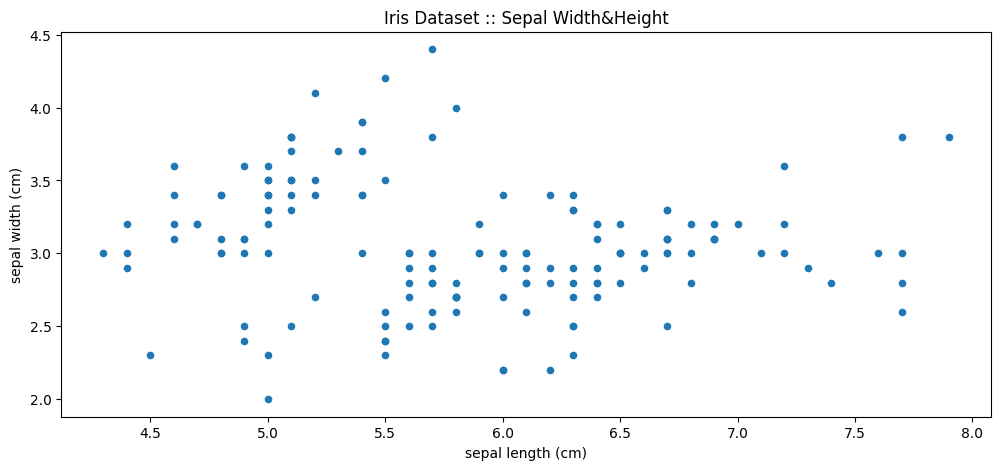

In [90]:
iris_df.plot(
    figsize=(12,5),
    kind='scatter',
    x='sepal length (cm)',
    y='sepal width (cm)',
    title='Iris Dataset :: Sepal Width&Height'
)

print(iris_df.corr())

> The __Sepal Width__ has very little correlation to all other metrics but itself. While the other three correlate nicely:

|  | sepal length (cm) | sepal width (cm) | petal length (cm) | petal width (cm) |
| -- | -- | -- | -- | -- |
| sepal length (cm) | 1.000000 | -0.117570 | 0.871754 | 0.817941 |
| sepal width (cm) | -0.117570 | 1.000000 | -0.428440 | -0.366126 |
| petal length (cm) | 0.871754 | -0.428440 | 1.000000 | 0.962865 |
| petal width (cm) | 0.817941 | -0.366126 | 0.962865 | 1.000000 |

![scikit-learn - Machine Learning in Python](./assets/Scikit_Learn_01.webp)

![scikit-learn - Machine Learning in Python](./assets/Scikit_Learn_02.webp)

#### Data Pre-processing

In [26]:
iris_df['petal length (cm)'][:1]
# 0    1.4
# Name: petal length (cm), dtype: float64

0    1.4
Name: petal length (cm), dtype: float64

In [27]:
iris_df['petal length (cm)'].values.reshape(-1,1)[:1]
# array([[1.4]])

array([[1.4]])

In [29]:
# scikit expects a 2s imput => remove index
X = iris_df['petal length (cm)'].values.reshape(-1,1)
y = iris_df['petal width (cm)'].values.reshape(-1,1)

In [30]:
# train/test split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
print(X_train.shape, X_test.shape)
# (120, 1) (30, 1) 80:20 split

(120, 1) (30, 1)


#### Model Training

In [41]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)

intercept = regressor.intercept_
slope = regressor.coef_

print(' Intercept: ', intercept, '\n Slope: ', slope)
#  Intercept:  [-0.35135666] 
#  Correlation Coeficient:  [[0.41310505]]

 Intercept:  [-0.35135666] 
 Slope:  [[0.41310505]]


#### Predictions

In [68]:
y_pred = regressor.predict([X_test[0]])
print(' Prediction: ', y_pred, '\n True Value: ', y_test[0])
#  Prediction:  [[0.22699041]] 
#  True Value:  [0.2]

 Prediction:  [[0.22699041]] 
 True Value:  [0.2]


In [59]:
def predict(value):
    return (slope*value + intercept)[0][0]

In [60]:
print('Prediction: ', predict(X_test[0]))
# Prediction:  [[0.22699041]]

Prediction:  0.22699041280334376


In [73]:
iris_df['petal width (cm) prediction'] = iris_df['petal length (cm)'].apply(predict)
print(' Prediction: ', iris_df['petal width (cm) prediction'][0], '\n True Value: ', iris_df['petal width (cm)'][0])
#  Prediction:  0.22699041280334376 
#  True Value:  0.2

 Prediction:  0.22699041280334376 
 True Value:  0.2


In [75]:
iris_df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),petal width (cm) prediction
0,5.1,3.5,1.4,0.2,0.226990
1,4.9,3.0,1.4,0.2,0.226990
2,4.7,3.2,1.3,0.2,0.185680
3,4.6,3.1,1.5,0.2,0.268301
4,5.0,3.6,1.4,0.2,0.226990
5,5.4,3.9,1.7,0.4,0.350922
6,4.6,3.4,1.4,0.3,0.226990
7,5.0,3.4,1.5,0.2,0.268301
8,4.4,2.9,1.4,0.2,0.226990
9,4.9,3.1,1.5,0.1,0.268301


|   | sepal length (cm) | sepal width (cm) | petal length (cm) | petal width (cm) | petal width (cm) prediction |
| -- | -- | -- | -- | -- | -- |
| 0 | 5.1 | 3.5 | 1.4 | 0.2 | 0.226990 |
| 1 | 4.9 | 3.0 | 1.4 | 0.2 | 0.226990 |
| 2 | 4.7 | 3.2 | 1.3 | 0.2 | 0.185680 |
| 3 | 4.6 | 3.1 | 1.5 | 0.2 | 0.268301 |
| 4 | 5.0 | 3.6 | 1.4 | 0.2 | 0.226990 |
| 5 | 5.4 | 3.9 | 1.7 | 0.4 | 0.350922 |
| 6 | 4.6 | 3.4 | 1.4 | 0.3 | 0.226990 |
| 7 | 5.0 | 3.4 | 1.5 | 0.2 | 0.268301 |
| 8 | 4.4 | 2.9 | 1.4 | 0.2 | 0.226990 |
| 9 | 4.9 | 3.1 | 1.5 | 0.1 | 0.268301 |

<AxesSubplot: title={'center': 'Iris Dataset - Sepal Width True vs Prediction'}, xlabel='petal width (cm)', ylabel='petal width (cm) prediction'>

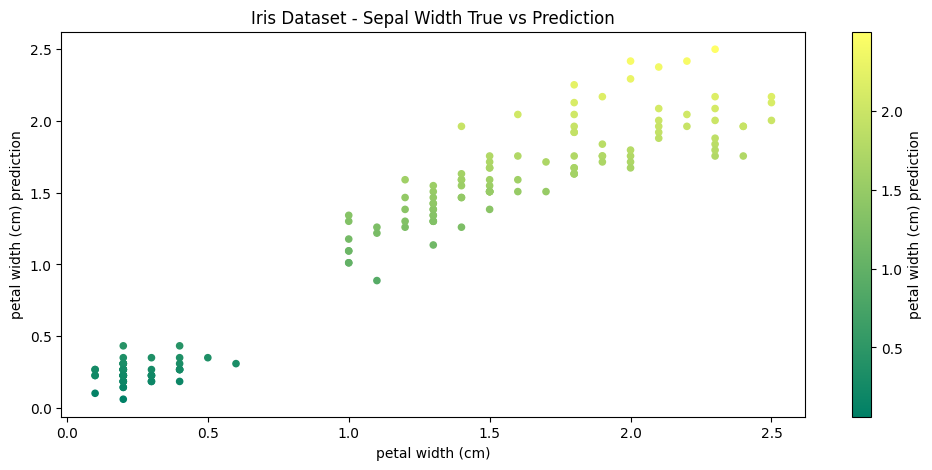

In [84]:
iris_df.plot(
    figsize=(12,5),
    kind='scatter',
    x='petal width (cm)',
    y='petal width (cm) prediction',
    # no value in colorizing..just looks pretty
    c='petal width (cm) prediction',
    colormap='summer',
    title='Iris Dataset - Sepal Width True vs Prediction'
)

![scikit-learn - Machine Learning in Python](./assets/Scikit_Learn_03.webp)

#### Model Evaluation

In [88]:
mae = mean_absolute_error(
    iris_df['petal width (cm)'],
    iris_df['petal width (cm) prediction']
)

mse = mean_squared_error(
    iris_df['petal width (cm)'],
    iris_df['petal width (cm) prediction']
)

rmse = np.sqrt(mse)

print(' MAE: ', mae, '\n MSE: ', mse, '\n RMSE: ', rmse)

#  MAE:  0.1569441318761155 
#  MSE:  0.04209214667485277 
#  RMSE:  0.2051637070118708

 MAE:  0.1569441318761155 
 MSE:  0.04209214667485277 
 RMSE:  0.2051637070118708


### ElasticNet Regression
#### Dataset

In [46]:
!wget https://raw.githubusercontent.com/Satish-Vennapu/DataScience/main/AMES_Final_DF.csv -P datasets

--2023-05-22 13:27:06--  https://raw.githubusercontent.com/Satish-Vennapu/DataScience/main/AMES_Final_DF.csv
Loaded CA certificate '/etc/ssl/certs/ca-certificates.crt'
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1793682 (1.7M) [text/plain]
Saving to: ‘datasets/AMES_Final_DF.csv’

AMES_Final_DF.csv   100%[===================>]   1.71M  2.62MB/s    in 0.7s    

2023-05-22 13:27:08 (2.62 MB/s) - ‘datasets/AMES_Final_DF.csv’ saved [1793682/1793682]



In [2]:
ames_df = pd.read_csv('datasets/AMES_Final_DF.csv')
ames_df.head(5).transpose()

,0,1,2,3,4
Lot Frontage,141.0,80.0,81.0,93.0,74.0
Lot Area,31770.0,11622.0,14267.0,11160.0,13830.0
Overall Qual,6.0,5.0,6.0,7.0,5.0
Overall Cond,5.0,6.0,6.0,5.0,5.0
Year Built,1960.0,1961.0,1958.0,1968.0,1997.0
...,...,...,...,...,...
Sale Condition_AdjLand,0.0,0.0,0.0,0.0,0.0
Sale Condition_Alloca,0.0,0.0,0.0,0.0,0.0
Sale Condition_Family,0.0,0.0,0.0,0.0,0.0
Sale Condition_Normal,1.0,1.0,1.0,1.0,1.0


|  | 0 | 1 | 2 | 3 | 4 |
| -- | -- | -- | -- | -- | -- |
| Lot Frontage | 141.0 | 80.0 | 81.0 | 93.0 | 74.0 |
| Lot Area | 31770.0 | 11622.0 | 14267.0 | 11160.0 | 13830.0 |
| Overall Qual | 6.0 | 5.0 | 6.0 | 7.0 | 5.0 |
| Overall Cond | 5.0 | 6.0 | 6.0 | 5.0 | 5.0 |
| Year Built | 1960.0 | 1961.0 | 1958.0 | 1968.0 | 1997.0 |
| ... |
| Sale Condition_AdjLand | 0.0 | 0.0 | 0.0 | 0.0 | 0.0 |
| Sale Condition_Alloca | 0.0 | 0.0 | 0.0 | 0.0 | 0.0 |
| Sale Condition_Family | 0.0 | 0.0 | 0.0 | 0.0 | 0.0 |
| Sale Condition_Normal | 1.0 | 1.0 | 1.0 | 1.0 | 1.0 |
| Sale Condition_Partial | 0.0 | 0.0 | 0.0 | 0.0 | 0.0 |
_274 rows × 5 columns_

In [3]:
# the target value is:
ames_df['SalePrice']

0       215000
1       105000
2       172000
3       244000
4       189900
         ...  
2920    142500
2921    131000
2922    132000
2923    170000
2924    188000
Name: SalePrice, Length: 2925, dtype: int64

|  |  |
| -- | -- |
|0 | 215000 |
|1 | 105000 |
|2 | 172000 |
|3 | 244000 |
|4 | 189900 |
|    ...    |
|2920 | 142500 |
|2921 | 131000 |
|2922 | 132000 |
|2923 | 170000 |
|2924 | 188000 |
_Name: SalePrice, Length: 2925, dtype: int64_

#### Preprocessing

In [4]:
# remove target column from training dataset
X_ames = ames_df.drop('SalePrice', axis=1)
y_ames = ames_df['SalePrice']

print(X_ames.shape, y_ames.shape)
# (2925, 273) (2925,)

(2925, 273) (2925,)


In [5]:
# train/test split
X_ames_train, X_ames_test, y_ames_train, y_ames_test = train_test_split(
    X_ames,
    y_ames,
    test_size=0.1,
    random_state=101
)

print(X_ames_train.shape, X_ames_test.shape)
# (2632, 273) (293, 273)

(2632, 273) (293, 273)


In [6]:
# normalize feature set
scaler = StandardScaler()
X_ames_train_scaled = scaler.fit_transform(X_ames_train)

X_ames_test_scaled = scaler.transform(X_ames_test)

#### Grid Search for Hyperparameters

In [7]:
base_ames_elastic_net_model = ElasticNet(max_iter=int(1e4))

In [8]:
param_grid = {
    'alpha': [50, 75, 100, 125, 150],
    'l1_ratio':[0.2, 0.4, 0.6, 0.8, 1.0]
}

In [9]:
grid_ames_model = GridSearchCV(
    estimator=base_ames_elastic_net_model,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=5, verbose=1
)

grid_ames_model.fit(X_ames_train_scaled, y_ames_train)

print(
    'Results:\nBest Estimator: ',
    grid_ames_model.best_estimator_,
    '\nBest Hyperparameter: ',
    grid_ames_model.best_params_
)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
Results:
Best Estimator:  ElasticNet(alpha=125, l1_ratio=1.0, max_iter=10000) 
Best Hyperparameter:  {'alpha': 125, 'l1_ratio': 1.0}


__Results__:
* Best Estimator:  `ElasticNet(alpha=125, l1_ratio=1.0, max_iter=10000)`
* Best Hyperparameter:  `{'alpha': 125, 'l1_ratio': 1.0}`

#### Model Evaluation

In [10]:
y_ames_pred = grid_ames_model.predict(X_ames_test_scaled)

print(
    'MAE: ',
    mean_absolute_error(y_ames_test, y_ames_pred),
    'MSE: ',
    mean_squared_error(y_ames_test, y_ames_pred),
    'RMSE: ',
    np.sqrt(mean_squared_error(y_ames_test, y_ames_pred))
)

# MAE:  14185.506207185055 MSE:  422714457.5190704 RMSE:  20560.020854052418

MAE:  14185.506207185055 MSE:  422714457.5190704 RMSE:  20560.020854052418


In [11]:
# average SalePrize
np.mean(ames_df['SalePrice'])
# 180815.53743589742

rel_error_avg = mean_absolute_error(y_ames_test, y_ames_pred) * 100 / np.mean(ames_df['SalePrice'])
print('Pridictions are on average off by: ', rel_error_avg.round(2), '%')
# Pridictions are on average off by:  7.85 %

Pridictions are on average off by:  7.85 %


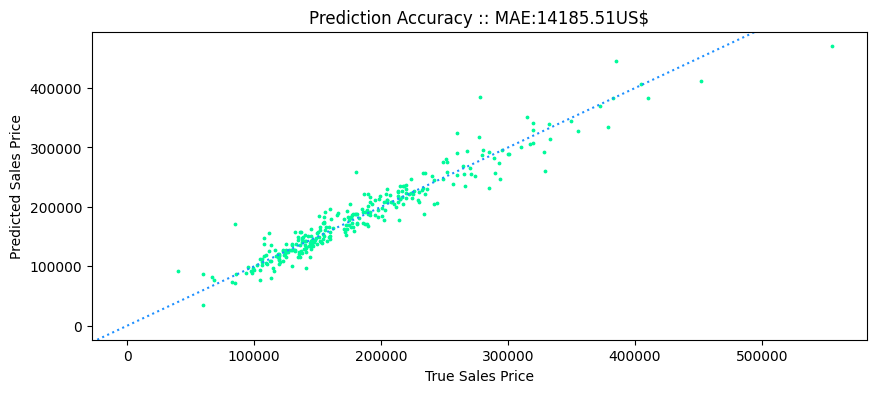

In [34]:
plt.figure(figsize=(10,4))

plt.scatter(y_ames_test,y_ames_pred, c='mediumspringgreen', s=3)
plt.axline((0, 0), slope=1, color='dodgerblue', linestyle=(':'))

plt.title('Prediction Accuracy :: MAE:'+ str(mean_absolute_error(y_ames_test, y_ames_pred).round(2)) + 'US$')
plt.xlabel('True Sales Price')
plt.ylabel('Predicted Sales Price')
plt.savefig('assets/Scikit_Learn_11.webp', bbox_inches='tight')

![scikit-learn - Machine Learning in Python](assets/Scikit_Learn_11.webp)

### Multiple Linear Regression

Above I used the `petal width` and `length` to create a linear regression model. But as explored earlier we can also use the `sepal length` (only the `sepal width` does not show a linear correlation):

In [91]:
print(iris_df.corr())

                             sepal length (cm)  sepal width (cm)  \
sepal length (cm)                     1.000000         -0.117570   
sepal width (cm)                     -0.117570          1.000000   
petal length (cm)                     0.871754         -0.428440   
petal width (cm)                      0.817941         -0.366126   
petal width (cm) prediction           0.871754         -0.428440   

                             petal length (cm)  petal width (cm)  \
sepal length (cm)                     0.871754          0.817941   
sepal width (cm)                     -0.428440         -0.366126   
petal length (cm)                     1.000000          0.962865   
petal width (cm)                      0.962865          1.000000   
petal width (cm) prediction           1.000000          0.962865   

                             petal width (cm) prediction  
sepal length (cm)                               0.871754  
sepal width (cm)                               -0.428440  
petal

|  | sepal length (cm) | sepal width (cm) | petal length (cm) | petal width (cm) |
| -- | -- | -- | -- | -- |
| sepal length (cm) | 1.000000 | -0.117570 | 0.871754 | 0.817941 |
| sepal width (cm) | -0.117570 | 1.000000 | -0.428440 | -0.366126 |
| petal length (cm) | 0.871754 | -0.428440 | 1.000000 | 0.962865 |
| petal width (cm) | 0.817941 | -0.366126 | 0.962865 | 1.000000 |

In [96]:
X_multi = iris_df[['petal length (cm)', 'sepal length (cm)']]
y = iris_df['petal width (cm)']

In [97]:
regressor_multi = LinearRegression()
regressor_multi.fit(X_multi, y)

intercept_multi = regressor_multi.intercept_
slope_multi = regressor_multi.coef_

print(' Intercept: ', intercept_multi, '\n Slope: ', slope_multi)

#  Intercept:  -0.00899597269816943 
#  Slope:  [ 0.44937611 -0.08221782]

 Intercept:  -0.00899597269816943 
 Slope:  [ 0.44937611 -0.08221782]


In [109]:
def predict_multi(petal_length, sepal_length):
    return (slope_multi[0]*petal_length + slope_multi[1]*sepal_length + intercept_multi)

In [114]:
y_pred = predict_multi(
    iris_df['petal length (cm)'][0],
    iris_df['sepal length (cm)'][0]
)

print(' Prediction: ', y_pred, '\n True value: ', iris_df['petal width (cm)'][0])
#  Prediction:  0.20081970121763193 
#  True value:  0.2

 Prediction:  0.20081970121763193 
 True value:  0.2


In [115]:
iris_df['petal width (cm) prediction (multi)'] = (
    (
        slope_multi[0] * iris_df['petal length (cm)']
    ) + (
        slope_multi[1] * iris_df['sepal length (cm)']
    ) + (
        intercept_multi
    ) 
)

In [116]:
iris_df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),petal width (cm) prediction,petal width (cm) prediction (multi)
0,5.1,3.5,1.4,0.2,0.226990,0.200820
1,4.9,3.0,1.4,0.2,0.226990,0.217263
2,4.7,3.2,1.3,0.2,0.185680,0.188769
3,4.6,3.1,1.5,0.2,0.268301,0.286866
4,5.0,3.6,1.4,0.2,0.226990,0.209041
5,5.4,3.9,1.7,0.4,0.350922,0.310967
6,4.6,3.4,1.4,0.3,0.226990,0.241929
7,5.0,3.4,1.5,0.2,0.268301,0.253979
8,4.4,2.9,1.4,0.2,0.226990,0.258372
9,4.9,3.1,1.5,0.1,0.268301,0.262201


|    | sepal length (cm) | sepal width (cm) | petal length (cm) | petal width (cm) | petal width (cm) prediction | petal width (cm) prediction (multi) |
| -- | -- | -- | -- | -- | -- | -- |
| 0 | 5.1 | 3.5 | 1.4 | 0.2 | 0.226990 | 0.200820 |
| 1 | 4.9 | 3.0 | 1.4 | 0.2 | 0.226990 | 0.217263 |
| 2 | 4.7 | 3.2 | 1.3 | 0.2 | 0.185680 | 0.188769 |
| 3 | 4.6 | 3.1 | 1.5 | 0.2 | 0.268301 | 0.286866 |
| 4 | 5.0 | 3.6 | 1.4 | 0.2 | 0.226990 | 0.209041 |
| 5 | 5.4 | 3.9 | 1.7 | 0.4 | 0.350922 | 0.310967 |
| 6 | 4.6 | 3.4 | 1.4 | 0.3 | 0.226990 | 0.241929 |
| 7 | 5.0 | 3.4 | 1.5 | 0.2 | 0.268301 | 0.253979 |
| 8 | 4.4 | 2.9 | 1.4 | 0.2 | 0.226990 | 0.258372 |
| 9 | 4.9 | 3.1 | 1.5 | 0.1 | 0.268301 | 0.262201 |

<AxesSubplot: title={'center': 'Iris Dataset - Sepal Width True vs Prediction (multi)'}, xlabel='petal width (cm)', ylabel='petal width (cm) prediction (multi)'>

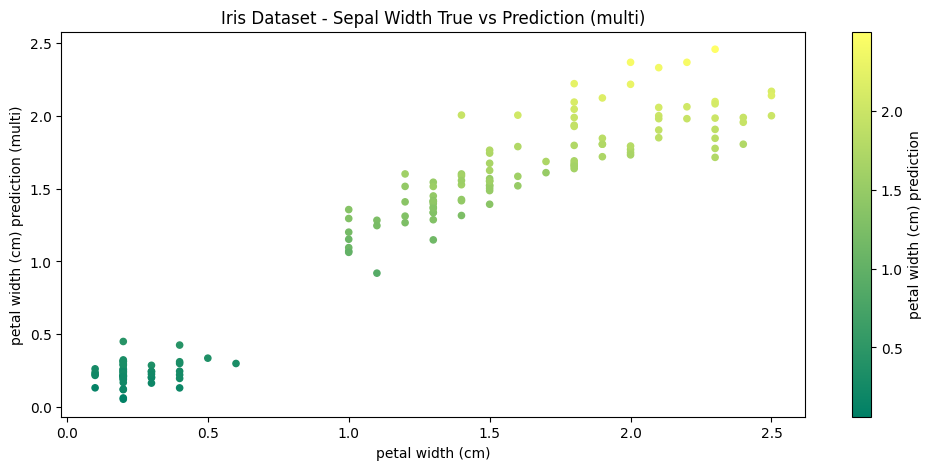

In [117]:
iris_df.plot(
    figsize=(12,5),
    kind='scatter',
    x='petal width (cm)',
    y='petal width (cm) prediction (multi)',
    c='petal width (cm) prediction',
    colormap='summer',
    title='Iris Dataset - Sepal Width True vs Prediction (multi)'
)

![scikit-learn - Machine Learning in Python](./assets/Scikit_Learn_04.webp)

In [120]:
mae_multi = mean_absolute_error(
    iris_df['petal width (cm)'],
    iris_df['petal width (cm) prediction (multi)']
)

mse_multi = mean_squared_error(
    iris_df['petal width (cm)'],
    iris_df['petal width (cm) prediction (multi)']
)

rmse_multi = np.sqrt(mse_multi)

print(' MAE_Multi: ', mae_multi,' MAE: ', mae, '\n MSE_Multi: ', mse_multi, ' MSE: ', mse, '\n RMSE_Multi: ', rmse_multi, ' RMSE: ', rmse)

 MAE_Multi:  0.15562108079300102  MAE:  0.1569441318761155 
 MSE_Multi:  0.04096208526408982  MSE:  0.04209214667485277 
 RMSE_Multi:  0.20239092189149646  RMSE:  0.2051637070118708


The accuracy of the model was improved by adding an additional, correlating value:

|          | Multi Regression   | Single Regression |
| --       | --                 | --                |
| Mean Absolute Error | 0.15562108079300102 | 0.1569441318761155 |
| Mean Squared Error | 0.04096208526408982 | 0.04209214667485277 |
| Root Mean Squared Error | 0.20239092189149646 | 0.2051637070118708 |

## Logistic Regression Model

### Binary Logistic Regression

#### Dataset

In [156]:
np.random.seed(666)

# generate 10 index values between 0-10
x_data_logistic_binary = np.random.randint(10, size=(10)).reshape(-1, 1)
# generate binary category for values above
y_data_logistic_binary = np.random.randint(2, size=10)

#### Model Fitting

In [157]:
logistic_binary_model = LogisticRegression(
    solver='liblinear',
    C=10.0,
    random_state=0
)

logistic_binary_model.fit(x_data_logistic_binary, y_data_logistic_binary)

intercept_logistic_binary = logistic_binary_model.intercept_
slope_logistic_binary = logistic_binary_model.coef_

print(' Intercept: ', intercept_logistic_binary, '\n Slope: ', slope_logistic_binary)

#  Intercept:  [-0.4832956] 
#  Slope:  [[0.11180522]]

 Intercept:  [-0.4832956] 
 Slope:  [[0.11180522]]


#### Model Predictions

In [159]:
prob_pred_logistic_binary = logistic_binary_model.predict_proba(x_data_logistic_binary)
y_pred_logistic_binary = logistic_binary_model.predict(x_data_logistic_binary)


print('Prediction Probabilities: ', prob_pred[:1])

unique, counts = np.unique(y_pred_logistic_binary, return_counts=True)
print('Classes: ', unique, '| Number of Class Instances: ', counts)

# probabilities e.g. below -> 58% certainty that the first element is class 0

# Prediction Probabilities:  [[0.58097284 0.41902716]]
# Classes:  [0 1] | Number of Class Instances:  [5 5]

Prediction Probabilities:  [[0.58097284 0.41902716]]
Classes:  [0 1] | Number of Class Instances:  [5 5]


#### Model Evaluation

In [168]:
conf_mtx = confusion_matrix(y_data_logistic_binary, y_pred_logistic_binary)
conf_mtx

# [2, 3] [TP, FP]
# [3, 2] [FN, TN]

array([[2, 3],
       [3, 2]])

![scikit-learn - Machine Learning in Python](assets/confusion-matrix.webp)

In [171]:
report = classification_report(y_data_logistic_binary, y_pred_logistic_binary)
print(report)

              precision    recall  f1-score   support

           0       0.40      0.40      0.40         5
           1       0.40      0.40      0.40         5

    accuracy                           0.40        10
   macro avg       0.40      0.40      0.40        10
weighted avg       0.40      0.40      0.40        10



|              | precision | recall | f1-score | support |
|    --        |  --  |  --  |  --  |  --  |
| 0            | 0.40 | 0.40 | 0.40 |   5  |
| 1            | 0.40 | 0.40 | 0.40 |   5  |
| accuracy     |      |      | 0.40 |  10  |
| macro avg    | 0.40 | 0.40 | 0.40 |  10  |
| weighted avg | 0.40 | 0.40 | 0.40 |  10  |

## Logistic Regression Pipelines

### Dataset Preprocessing

In [57]:
iris_ds = load_iris()

# train/test split
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(
    iris_ds.data,
    iris_ds.target,
    test_size=0.2,
    random_state=42
)
print(X_train_iris.shape, X_test_iris.shape)
# (120, 4) (30, 4)

(120, 4) (30, 4)


### Pipeline

In [61]:
pipe_iris = Pipeline([
    ('minmax', MinMaxScaler()),
    ('log_reg', LogisticRegression()),
])

pipe_iris.fit(X_train_iris, y_train_iris)

Pipeline(steps=[('minmax', MinMaxScaler()), ('log_reg', LogisticRegression())])

In [65]:
iris_score = pipe_iris.score(X_test_iris, y_test_iris)
print('Prediction Accuracy: ', iris_score.round(4)*100, '%')
# Prediction Accuracy:  96.67 %

Prediction Accuracy:  96.67 %


## Cross Validation

### Train | Test Split

#### Dataset Preprocessing

In [14]:
!wget https://raw.githubusercontent.com/reisanar/datasets/master/Advertising.csv -P datasets

--2023-05-21 21:13:14--  https://raw.githubusercontent.com/reisanar/datasets/master/Advertising.csv
Loaded CA certificate '/etc/ssl/certs/ca-certificates.crt'
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4061 (4.0K) [text/plain]
Saving to: ‘datasets/Advertising.csv’

Advertising.csv     100%[===================>]   3.97K  --.-KB/s    in 0.001s  

2023-05-21 21:13:15 (4.05 MB/s) - ‘datasets/Advertising.csv’ saved [4061/4061]



In [2]:
adv_df = pd.read_csv('datasets/Advertising.csv')
adv_df.head(5)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


|  | TV | Radio | Newspaper | Sales |
| -- | -- | -- | -- | -- |
| 0 | 230.1 | 37.8 | 69.2 | 22.1 |
| 1 | 44.5 | 39.3 | 45.1 | 10.4 |
| 2 | 17.2 | 45.9 | 69.3 | 9.3 |
| 3 | 151.5 | 41.3 | 58.5 | 18.5 |
| 4 | 180.8 | 10.8 | 58.4 | 12.9 |

In [3]:
# Split ds into features and targets
X_adv = adv_df.drop('Sales', axis=1)
y_adv = adv_df['Sales']

In [56]:
# 70:30 train/test split
X_adv_train, X_adv_test, y_adv_train, y_adv_test = train_test_split(
    X_adv, y_adv, test_size=0.3, random_state=666
)

print(X_adv_train.shape, y_adv_train.shape)
# (140, 3) (140,)

(140, 3) (140,)


In [57]:
# normalize features
scaler_adv = StandardScaler()
scaler_adv.fit(X_adv_train)

X_adv_train = scaler_adv.transform(X_adv_train)
X_adv_test = scaler_adv.transform(X_adv_test)

#### Model Fitting

In [59]:
model_adv1 = Ridge(
    alpha=100.0
)

model_adv1.fit(X_adv_train, y_adv_train)

Ridge(alpha=100.0)

#### Model Evaluation

In [61]:
y_adv_pred = model_adv1.predict(X_adv_test)

mean_squared_error(y_adv_test, y_adv_pred)
# 6.528575771818745

6.528575771818745

#### Adjusting Hyper Parameter

In [62]:
model_adv2 = Ridge(
    alpha=1.0
)

model_adv2.fit(X_adv_train, y_adv_train)

Ridge()

In [63]:
y_adv_pred2 = model_adv2.predict(X_adv_test)
mean_squared_error(y_adv_test, y_adv_pred2)
# 2.3319016551123535

2.3319016551123535

### Train | Validation | Test Split

#### Dataset Preprocessing

In [74]:
# 70:30 train/temp split
X_adv_train, X_adv_temp, y_adv_train, y_adv_temp = train_test_split(
    X_adv, y_adv, test_size=0.3, random_state=666
)

# 50:50 test/val split
X_adv_test, X_adv_val, y_adv_test, y_adv_val = train_test_split(
    X_adv_temp, y_adv_temp, test_size=0.5, random_state=666
)

print(X_adv_train.shape, X_adv_test.shape, X_adv_val.shape)
# (140, 3) (30, 3) (30, 3)

(140, 3) (30, 3) (30, 3)


In [75]:
# normalize features
scaler_adv = StandardScaler()
scaler_adv.fit(X_adv_train)

X_adv_train = scaler_adv.transform(X_adv_train)
X_adv_test = scaler_adv.transform(X_adv_test)
X_adv_val = scaler_adv.transform(X_adv_val)

#### Model Fitting and Evaluation

In [76]:
model_adv3 = Ridge(
    alpha=100.0
)

model_adv3.fit(X_adv_train, y_adv_train)

Ridge(alpha=100.0)

In [78]:
# do evaluation with the validation set
y_adv_pred3 = model_adv3.predict(X_adv_val)
mean_squared_error(y_adv_val, y_adv_pred3)
# 7.136230975501291

7.136230975501291

#### Adjusting Hyper Parameter

In [80]:
model_adv4 = Ridge(
    alpha=1.0
)

model_adv4.fit(X_adv_train, y_adv_train)

y_adv_pred4 = model_adv4.predict(X_adv_val)
mean_squared_error(y_adv_val, y_adv_pred4)
# 2.6393803874124435

2.6393803874124435

In [81]:
# only once you are certain that you have the best performance
# do a final evaluation with the test set
y_adv4_final_pred = model_adv4.predict(X_adv_test)
mean_squared_error(y_adv_test, y_adv4_final_pred)
# 2.024422922812264

2.024422922812264

### k-fold Cross Validation

Do a train/test split and segment the training set by k-folds (e.g. 5-10) and use each of those segments once to validate a training step. The resulting error is the average of all k errors.

#### Dataset Preprocessing

In [84]:
# 70:30 train/temp split
X_adv_train, X_adv_test, y_adv_train, y_adv_test = train_test_split(
    X_adv, y_adv, test_size=0.3, random_state=666
)

In [85]:
# normalize features
scaler_adv = StandardScaler()
scaler_adv.fit(X_adv_train)

X_adv_train = scaler_adv.transform(X_adv_train)
X_adv_test = scaler_adv.transform(X_adv_test)

#### Model Scoring

In [87]:
model_adv5 = Ridge(
    alpha=100.0
)

In [94]:
# do a 5-fold cross-eval
scores = cross_val_score(
    estimator=model_adv5,
    X=X_adv_train,
    y=y_adv_train,
    scoring='neg_mean_squared_error',
    cv=5
)

# take the mean of all five neg. error values
abs(scores.mean())
# 8.688107513529168

8.688107513529168

#### Adjusting Hyper Parameter

In [20]:
model_adv6 = Ridge(
    alpha=1.0
)

In [93]:
# do a 5-fold cross-eval
scores = cross_val_score(
    estimator=model_adv6,
    X=X_adv_train,
    y=y_adv_train,
    scoring='neg_mean_squared_error',
    cv=5
)

# take the mean of all five neg. error values
abs(scores.mean())
# 3.3419582340688576

3.3419582340688576

#### Model Fitting and Final Evaluation

In [95]:
model_adv6.fit(X_adv_train, y_adv_train)

y_adv6_final_pred = model_adv6.predict(X_adv_test)
mean_squared_error(y_adv_test, y_adv6_final_pred)
# 2.3319016551123535

2.3319016551123535

### Cross Validate

#### Dataset (re-import)

In [6]:
adv_df = pd.read_csv('datasets/Advertising.csv')
X_adv = adv_df.drop('Sales', axis=1)
y_adv = adv_df['Sales']

In [7]:
# 70:30 train/test split
X_adv_train, X_adv_test, y_adv_train, y_adv_test = train_test_split(
    X_adv, y_adv, test_size=0.3, random_state=666
)

In [8]:
# normalize features
scaler_adv = StandardScaler()
scaler_adv.fit(X_adv_train)

X_adv_train = scaler_adv.transform(X_adv_train)
X_adv_test = scaler_adv.transform(X_adv_test)

#### Model Scoring

In [12]:
model_adv7 = Ridge(
    alpha=100.0
)

In [13]:
scores = cross_validate(
    model_adv7,
    X_adv_train,
    y_adv_train,
    scoring=[
        'neg_mean_squared_error',
        'neg_mean_absolute_error'
    ],
    cv=10
)

In [17]:
scores_df = pd.DataFrame(scores)
scores_df

,fit_time,score_time,test_neg_mean_squared_error,test_neg_mean_absolute_error
0,0.016399,0.000749,-12.539147,-2.851864
1,0.000684,0.000452,-2.806466,-1.423516
2,0.000937,0.000782,-11.142227,-2.740332
3,0.001060,0.000633,-7.237347,-2.196963
4,0.001045,0.000738,-11.313985,-2.690813
5,0.000650,0.000510,-3.169169,-1.526568
6,0.000698,0.000429,-6.578249,-1.727616
7,0.000600,0.000423,-5.740245,-1.640964
8,0.000565,0.000463,-10.268075,-2.415688
9,0.000562,0.000487,-10.641669,-1.974407


|   | fit_time | score_time | test_neg_mean_squared_error | test_neg_mean_absolute_error |
| -- | -- | -- | -- | -- |
| 0 | 0.016399 | 0.000749 | -12.539147 | -2.851864 |
| 1 | 0.000684 | 0.000452 | -2.806466 | -1.423516 |
| 2 | 0.000937 | 0.000782 | -11.142227 | -2.740332 |
| 3 | 0.001060 | 0.000633 | -7.237347 | -2.196963 |
| 4 | 0.001045 | 0.000738 | -11.313985 | -2.690813 |
| 5 | 0.000650 | 0.000510 | -3.169169 | -1.526568 |
| 6 | 0.000698 | 0.000429 | -6.578249 | -1.727616 |
| 7 | 0.000600 | 0.000423 | -5.740245 | -1.640964 |
| 8 | 0.000565 | 0.000463 | -10.268075 | -2.415688 |
| 9 | 0.000562 | 0.000487 | -10.641669 | -1.974407 |

In [19]:
abs(scores_df.mean())

fit_time                        0.002320
score_time                      0.000566
test_neg_mean_squared_error     8.143658
test_neg_mean_absolute_error    2.118873
dtype: float64

| | |
| -- | -- |
| fit_time                    |    0.002320 |
| score_time                  |    0.000566 |
| test_neg_mean_squared_error   | 8.143658 |
| test_neg_mean_absolute_error  | 2.118873 |
_dtype: float64_

#### Adjusting Hyper Parameter

In [22]:
model_adv8 = Ridge(
    alpha=1.0
)

In [23]:
scores = cross_validate(
    model_adv8,
    X_adv_train,
    y_adv_train,
    scoring=[
        'neg_mean_squared_error',
        'neg_mean_absolute_error'
    ],
    cv=10
)

abs(pd.DataFrame(scores).mean())

fit_time                        0.001141
score_time                      0.000777
test_neg_mean_squared_error     3.272673
test_neg_mean_absolute_error    1.345709
dtype: float64

| | |
| -- | -- |
| fit_time                    |    0.001141 |
| score_time                  |    0.000777 |
| test_neg_mean_squared_error   | 3.272673 |
| test_neg_mean_absolute_error  | 1.345709 |
_dtype: float64_

#### Model Fitting and Final Evaluation

In [25]:
model_adv8.fit(X_adv_train, y_adv_train)

y_adv8_final_pred = model_adv8.predict(X_adv_test)
mean_squared_error(y_adv_test, y_adv8_final_pred)
# 2.3319016551123535

2.3319016551123535

### Grid Search

Loop through a set of hyperparameters to find an optimum.

#### Hyperparameter Search

In [27]:
base_elastic_net_model = ElasticNet()

In [28]:
param_grid = {
    'alpha': [0.1, 1, 5, 10, 50, 100],
    'l1_ratio':[0.1, 0.3, 0.5, 0.7, 0.9, 1.0]
}

In [34]:
grid_model = GridSearchCV(
    estimator=base_elastic_net_model,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=5, verbose=2
)

grid_model.fit(X_adv_train, y_adv_train)

print(
    'Results:\nBest Estimator: ',
    grid_model.best_estimator_,
    '\nBest Hyperparameter: ',
    grid_model.best_params_
)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.3; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.3; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.3; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.3; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.3; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.1,

__Results__:
* Best Estimator:  `ElasticNet(alpha=0.1, l1_ratio=1.0)`
* Best Hyperparameter:  `{'alpha': 0.1, 'l1_ratio': 1.0}`

In [38]:
gridcv_results = pd.DataFrame(grid_model.cv_results_)

|  | mean_fit_time | std_fit_time | mean_score_time | std_score_time | param_alpha | param_l1_ratio | params | split0_test_score | split1_test_score | split2_test_score | split3_test_score | split4_test_score | mean_test_score | std_test_score | rank_test_score |
| -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- |
| 0 | 0.001156 | 0.000160 | 0.000449 | 0.000038 | 0.1 | 0.1 | {'alpha': 0.1, 'l1_ratio': 0.1} | -1.924119 | -3.384152 | -3.588444 | -3.703040 | -5.091974 | -3.538346 | 1.007264 | 6 |
| 1 | 0.001144 | 0.000181 | 0.000407 | 0.000091 | 0.1 | 0.3 | {'alpha': 0.1, 'l1_ratio': 0.3} | -1.867117 | -3.304382 | -3.561106 | -3.623188 | -5.061781 | -3.483515 | 1.016000 | 5 |
| 2 | 0.000623 | 0.000026 | 0.000272 | 0.000052 | 0.1 | 0.5 | {'alpha': 0.1, 'l1_ratio': 0.5} | -1.812633 | -3.220727 | -3.539711 | -3.547572 | -5.043259 | -3.432780 | 1.028406 | 4 |
| 3 | 0.000932 | 0.000165 | 0.000321 | 0.000060 | 0.1 | 0.7 | {'alpha': 0.1, 'l1_ratio': 0.7} | -1.750153 | -3.144120 | -3.525226 | -3.477228 | -5.034008 | -3.386147 | 1.046722 | 3 |
| 4 | 0.000725 | 0.000106 | 0.000259 | 0.000024 | 0.1 | 0.9 | {'alpha': 0.1, 'l1_ratio': 0.9} | -1.693440 | -3.075686 | -3.518777 | -3.413393 | -5.029683 | -3.346196 | 1.065195 | 2 |
| 5 | 0.000654 | 0.000053 | 0.000274 | 0.000026 | 0.1 | 1.0 | {'alpha': 0.1, 'l1_ratio': 1.0} | -1.667506 | -3.044928 | -3.518866 | -3.384363 | -5.031297 | -3.329392 | 1.075006 | 1 |
| 6 | 0.000595 | 0.000016 | 0.000244 | 0.000002 | 1 | 0.1 | {'alpha': 1, 'l1_ratio': 0.1} | -8.575470 | -11.021534 | -8.212152 | -6.808719 | -10.792072 | -9.081990 | 1.604192 | 12 |
| 7 | 0.000591 | 0.000018 | 0.000244 | 0.000002 | 1 | 0.3 | {'alpha': 1, 'l1_ratio': 0.3} | -8.131855 | -10.448423 | -7.774620 | -6.179358 | -10.071728 | -8.521197 | 1.569173 | 11 |
| 8 | 0.000628 | 0.000049 | 0.000266 | 0.000023 | 1 | 0.5 | {'alpha': 1, 'l1_ratio': 0.5} | -7.519809 | -9.562473 | -7.261824 | -5.453399 | -9.213320 | -7.802165 | 1.481785 | 10 |
| 9 | 0.000594 | 0.000015 | 0.000243 | 0.000002 | 1 | 0.7 | {'alpha': 1, 'l1_ratio': 0.7} | -6.614835 | -8.351711 | -6.702104 | -4.698977 | -8.230616 | -6.919649 | 1.329741 | 9 |
| 10 | 0.000714 | 0.000108 | 0.000268 | 0.000033 | 1 | 0.9 | {'alpha': 1, 'l1_ratio': 0.9} | -5.537250 | -6.887828 | -6.148400 | -4.106124 | -7.101573 | -5.956235 | 1.078430 | 8 |
| 11 | 0.000649 | 0.000067 | 0.000263 | 0.000028 | 1 | 1.0 | {'alpha': 1, 'l1_ratio': 1.0} | -4.932027 | -6.058207 | -5.892529 | -3.798441 | -6.472871 | -5.430815 | 0.959804 | 7 |
| 12 | 0.000645 | 0.000042 | 0.000264 | 0.000040 | 5 | 0.1 | {'alpha': 5, 'l1_ratio': 0.1} | -21.863798 | -25.767488 | -18.768865 | -12.608680 | -23.207907 | -20.443347 | 4.520904 | 13 |
| 13 | 0.000617 | 0.000030 | 0.000281 | 0.000038 | 5 | 0.3 | {'alpha': 5, 'l1_ratio': 0.3} | -23.626694 | -27.439028 | -20.266203 | -12.788078 | -24.609195 | -21.745840 | 5.031493 | 14 |
| 14 | 0.000599 | 0.000011 | 0.000249 | 0.000013 | 5 | 0.5 | {'alpha': 5, 'l1_ratio': 0.5} | -26.202964 | -29.867138 | -22.527913 | -13.423857 | -26.835934 | -23.771561 | 5.675911 | 15 |
| 15 | 0.000588 | 0.000013 | 0.000276 | 0.000035 | 5 | 0.7 | {'alpha': 5, 'l1_ratio': 0.7} | -27.768946 | -33.428462 | -23.506474 | -14.599984 | -29.112276 | -25.683228 | 6.382379 | 17 |
| 16 | 0.000580 | 0.000003 | 0.000271 | 0.000001 | 5 | 0.9 | {'alpha': 5, 'l1_ratio': 0.9} | -29.868949 | -34.423737 | -25.623955 | -16.750237 | -31.056181 | -27.544612 | 6.087093 | 19 |
| 17 | 0.000591 | 0.000011 | 0.000259 | 0.000021 | 5 | 1.0 | {'alpha': 5, 'l1_ratio': 1.0} | -29.868949 | -34.423737 | -25.623955 | -16.750237 | -31.056181 | -27.544612 | 6.087093 | 19 |
| 18 | 0.000632 | 0.000028 | 0.000250 | 0.000012 | 10 | 0.1 | {'alpha': 10, 'l1_ratio': 0.1} | -26.179546 | -30.396420 | -22.386698 | -14.596498 | -27.292337 | -24.170300 | 5.429322 | 16 |
| 19 | 0.000593 | 0.000020 | 0.000239 | 0.000001 | 10 | 0.3 | {'alpha': 10, 'l1_ratio': 0.3} | -28.704426 | -33.379967 | -24.561645 | -15.634153 | -29.883725 | -26.432783 | 6.090062 | 18 |
| 20 | 0.000595 | 0.000036 | 0.000245 | 0.000013 | 10 | 0.5 | {'alpha': 10, 'l1_ratio': 0.5} | -29.868949 | -34.423737 | -25.623955 | -16.750237 | -31.056181 | -27.544612 | 6.087093 | 19 |
| 21 | 0.000610 | 0.000053 | 0.000258 | 0.000015 | 10 | 0.7 | {'alpha': 10, 'l1_ratio': 0.7} | -29.868949 | -34.423737 | -25.623955 | -16.750237 | -31.056181 | -27.544612 | 6.087093 | 19 |
| 22 | 0.000597 | 0.000022 | 0.000248 | 0.000015 | 10 | 0.9 | {'alpha': 10, 'l1_ratio': 0.9} | -29.868949 | -34.423737 | -25.623955 | -16.750237 | -31.056181 | -27.544612 | 6.087093 | 19 |
| 23 | 0.000623 | 0.000057 | 0.000305 | 0.000076 | 10 | 1.0 | {'alpha': 10, 'l1_ratio': 1.0} | -29.868949 | -34.423737 | -25.623955 | -16.750237 | -31.056181 | -27.544612 | 6.087093 | 19 |
| 24 | 0.000602 | 0.000016 | 0.000252 | 0.000013 | 50 | 0.1 | {'alpha': 50, 'l1_ratio': 0.1} | -29.868949 | -34.423737 | -25.623955 | -16.750237 | -31.056181 | -27.544612 | 6.087093 | 19 |
| 25 | 0.000577 | 0.000009 | 0.000238 | 0.000001 | 50 | 0.3 | {'alpha': 50, 'l1_ratio': 0.3} | -29.868949 | -34.423737 | -25.623955 | -16.750237 | -31.056181 | -27.544612 | 6.087093 | 19 |
| 26 | 0.000607 | 0.000046 | 0.000245 | 0.000010 | 50 | 0.5 | {'alpha': 50, 'l1_ratio': 0.5} | -29.868949 | -34.423737 | -25.623955 | -16.750237 | -31.056181 | -27.544612 | 6.087093 | 19 |
| 27 | 0.000569 | 0.000004 | 0.000259 | 0.000012 | 50 | 0.7 | {'alpha': 50, 'l1_ratio': 0.7} | -29.868949 | -34.423737 | -25.623955 | -16.750237 | -31.056181 | -27.544612 | 6.087093 | 19 |
| 28 | 0.000582 | 0.000022 | 0.000244 | 0.000011 | 50 | 0.9 | {'alpha': 50, 'l1_ratio': 0.9} | -29.868949 | -34.423737 | -25.623955 | -16.750237 | -31.056181 | -27.544612 | 6.087093 | 19 |
| 29 | 0.000603 | 0.000041 | 0.000251 | 0.000015 | 50 | 1.0 | {'alpha': 50, 'l1_ratio': 1.0} | -29.868949 | -34.423737 | -25.623955 | -16.750237 | -31.056181 | -27.544612 | 6.087093 | 19 |
| 30 | 0.000670 | 0.000106 | 0.000251 | 0.000013 | 100 | 0.1 | {'alpha': 100, 'l1_ratio': 0.1} | -29.868949 | -34.423737 | -25.623955 | -16.750237 | -31.056181 | -27.544612 | 6.087093 | 19 |
| 31 | 0.000764 | 0.000179 | 0.000343 | 0.000054 | 100 | 0.3 | {'alpha': 100, 'l1_ratio': 0.3} | -29.868949 | -34.423737 | -25.623955 | -16.750237 | -31.056181 | -27.544612 | 6.087093 | 19 |
| 32 | 0.000623 | 0.000077 | 0.000244 | 0.000007 | 100 | 0.5 | {'alpha': 100, 'l1_ratio': 0.5} | -29.868949 | -34.423737 | -25.623955 | -16.750237 | -31.056181 | -27.544612 | 6.087093 | 19 |
| 33 | 0.000817 | 0.000156 | 0.000329 | 0.000076 | 100 | 0.7 | {'alpha': 100, 'l1_ratio': 0.7} | -29.868949 | -34.423737 | -25.623955 | -16.750237 | -31.056181 | -27.544612 | 6.087093 | 19 |
| 34 | 0.000590 | 0.000017 | 0.000242 | 0.000004 | 100 | 0.9 | {'alpha': 100, 'l1_ratio': 0.9} | -29.868949 | -34.423737 | -25.623955 | -16.750237 | -31.056181 | -27.544612 | 6.087093 | 19 |
| 35 | 0.000595 | 0.000027 | 0.000242 | 0.000007 | 100 | 1.0 | {'alpha': 100, 'l1_ratio': 1.0} | -29.868949 | -34.423737 | -25.623955 | -16.750237 | -31.056181 | -27.544612 | 6.087093 | 19 |

<AxesSubplot: title={'center': 'Grid Search Hyperparameter :: Parameter'}>

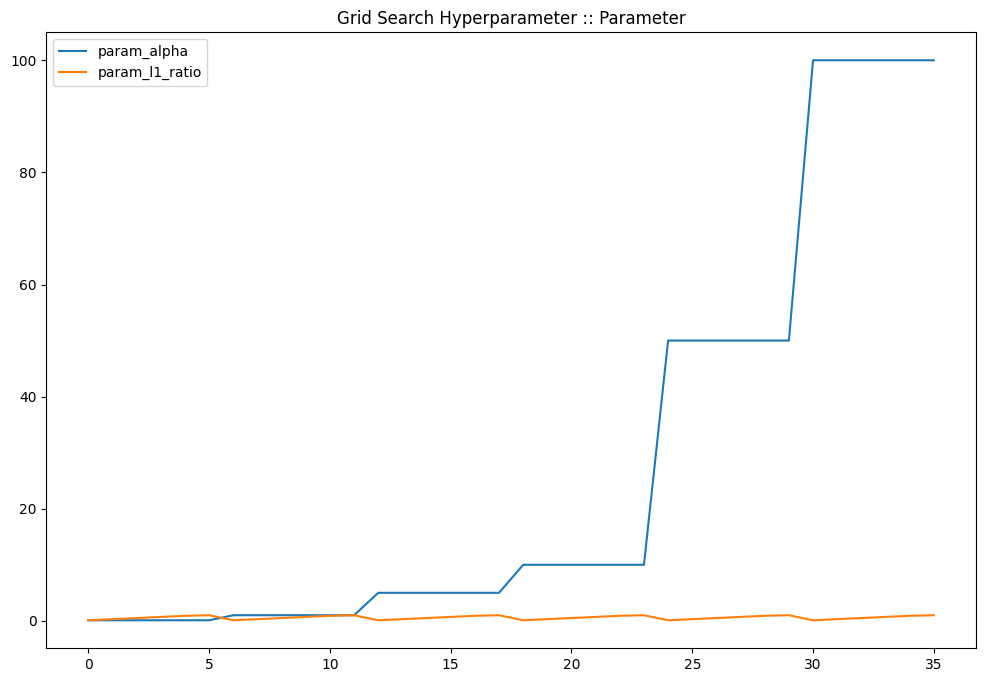

In [44]:
gridcv_results[
    [
        'param_alpha',
        'param_l1_ratio'
    ]
].plot(title='Grid Search Hyperparameter :: Parameter', figsize=(12,8))

![scikit-learn - Machine Learning in Python](assets/Scikit_Learn_08.webp)

<AxesSubplot: title={'center': 'Grid Search Hyperparameter :: Timing'}>

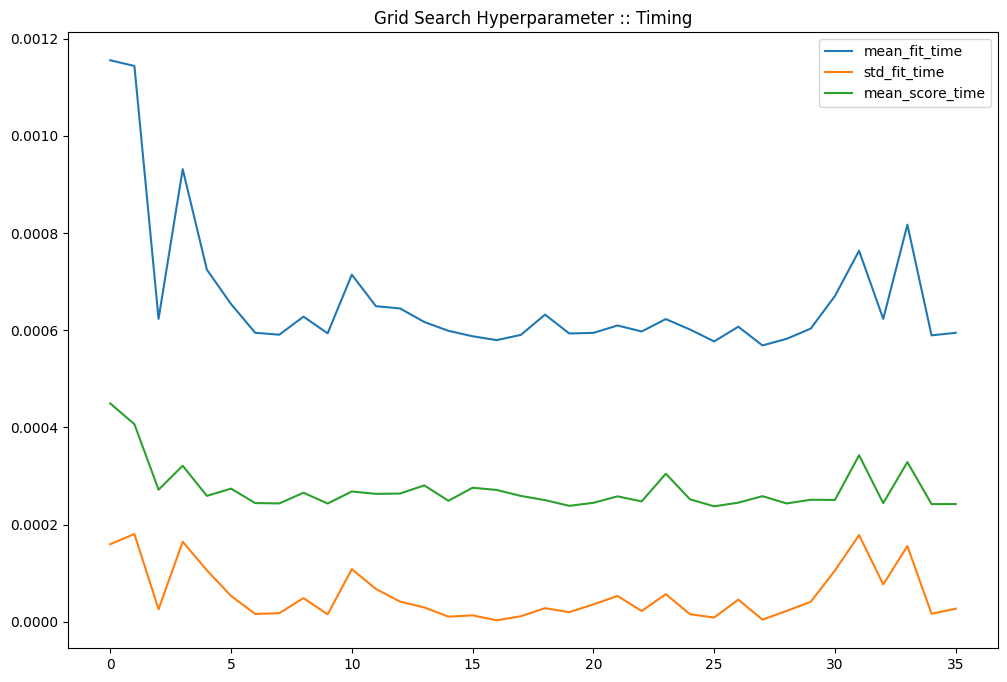

In [43]:
gridcv_results[
    [
        'mean_fit_time',
        'std_fit_time',
        'mean_score_time'
    ]
].plot(title='Grid Search Hyperparameter :: Timing', figsize=(12,8))

![scikit-learn - Machine Learning in Python](assets/Scikit_Learn_09.webp)

<AxesSubplot: title={'center': 'Grid Search Hyperparameter :: Parameter'}>

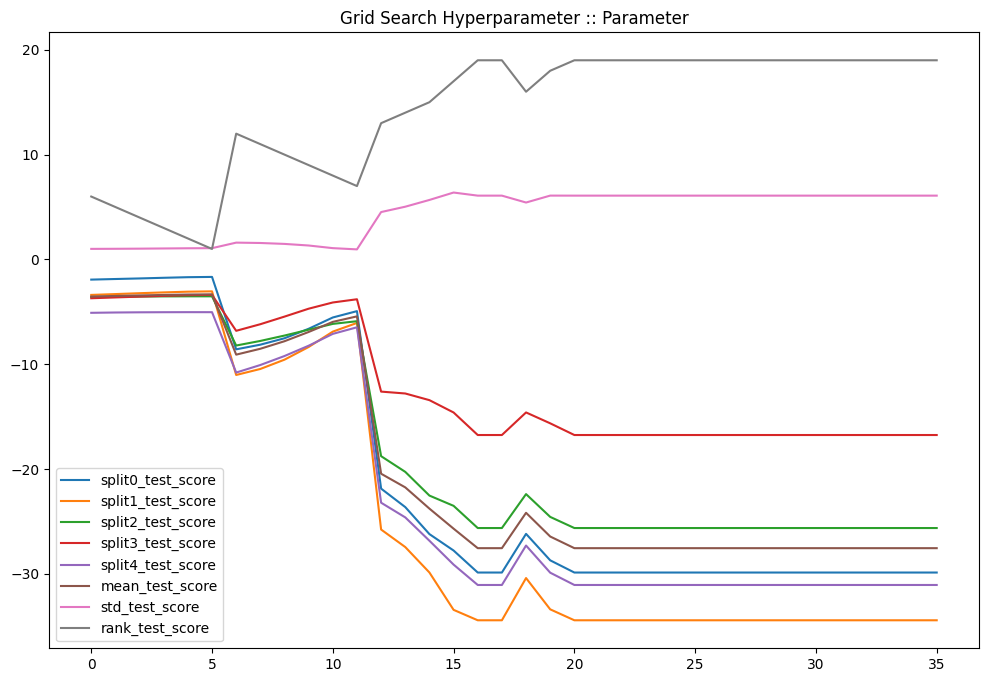

In [42]:
gridcv_results[
    [
        'split0_test_score',
        'split1_test_score',
        'split2_test_score',
        'split3_test_score',
        'split4_test_score',
        'mean_test_score',
        'std_test_score',
       'rank_test_score'
    ]
].plot(title='Grid Search Hyperparameter :: Parameter', figsize=(12,8))

![scikit-learn - Machine Learning in Python](assets/Scikit_Learn_10.webp)

#### Model Evaluation

In [45]:
y_grid_pred = grid_model.predict(X_adv_test)

mean_squared_error(y_adv_test, y_grid_pred)
# 2.380865536033581

2.380865536033581

## KNN Algorithm

### Dataset

In [175]:
wine = load_wine()
print(wine.data.shape)
print(wine.feature_names)
print(wine.data[:1])

# (178, 13)
# ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
# [[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
#   2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]]

(178, 13)
['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
[[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
  2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]]


In [179]:
wine_df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
wine_df.head(2).T

,0,1
alcohol,14.23,13.20
malic_acid,1.71,1.78
ash,2.43,2.14
alcalinity_of_ash,15.60,11.20
magnesium,127.00,100.00
total_phenols,2.80,2.65
flavanoids,3.06,2.76
nonflavanoid_phenols,0.28,0.26
proanthocyanins,2.29,1.28
color_intensity,5.64,4.38


|  | 0 | 1 |
| -- | -- | -- |
| alcohol | 14.23 | 13.20 |
| malic_acid | 1.71 | 1.78 |
| ash | 2.43 | 2.14 |
| alcalinity_of_ash | 15.60 | 11.20 |
| magnesium | 127.00 | 100.00 |
| total_phenols | 2.80 | 2.65 |
| flavanoids | 3.06 | 2.76 |
| nonflavanoid_phenols | 0.28 | 0.26 |
| proanthocyanins | 2.29 | 1.28 |
| color_intensity | 5.64 | 4.38 |
| hue | 1.04 | 1.05 |
| od280/od315_of_diluted_wines | 3.92 | 3.40 |
| proline | 1065.00 | 1050.00 |

### Data Pre-processing

In [196]:
# normalization
scaler = MinMaxScaler()
scaler.fit(wine.data)
wine_norm = scaler.fit_transform(wine.data)

In [197]:
# train/test split
X_train_wine, X_test_wine, y_train_wine, y_test_wine = train_test_split(
    wine_norm,
    wine.target,
    test_size=0.3
)

print(X_train_wine.shape, X_test_wine.shape)
# (124, 13) (54, 13)

(124, 13) (54, 13)


### Model Fitting

In [198]:
# model for k=3
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_wine, y_train_wine)

y_pred_wine_knn3 = knn.predict(X_test_wine)
print('Accuracy Score: ', (accuracy_score(y_test_wine, y_pred_wine_knn3)*100).round(2), '%')
# Accuracy Score:  98.15 %

Accuracy Score:  98.15 %


In [199]:
# model for k=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_wine, y_train_wine)

y_pred_wine_knn5 = knn.predict(X_test_wine)
print('Accuracy Score: ', (accuracy_score(y_test_wine, y_pred_wine_knn5)*100).round(2), '%')
# Accuracy Score:  98.15 %

Accuracy Score:  98.15 %


In [200]:
# model for k=7
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_wine, y_train_wine)

y_pred_wine_knn7 = knn.predict(X_test_wine)
print('Accuracy Score: ', (accuracy_score(y_test_wine, y_pred_wine_knn7)*100).round(2), '%')
# Accuracy Score:  96.3 %

Accuracy Score:  96.3 %


In [201]:
# model for k=9
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_wine, y_train_wine)

y_pred_wine_knn7 = knn.predict(X_test_wine)
print('Accuracy Score: ', (accuracy_score(y_test_wine, y_pred_wine_knn7)*100).round(2), '%')
# Accuracy Score:  96.3 %

Accuracy Score:  96.3 %


## Decision Tree Classifier

* Does not require normalization
* Is not sensitive to missing values

### Dataset

In [203]:
!wget https://gist.githubusercontent.com/Dviejopomata/ea5869ba4dcff84f8c294dc7402cd4a9/raw/4671f90b8b04ba4db9d67acafaa4c0827cd233c2/bill_authentication.csv -P datasets

--2023-05-20 20:36:54--  https://gist.githubusercontent.com/Dviejopomata/ea5869ba4dcff84f8c294dc7402cd4a9/raw/4671f90b8b04ba4db9d67acafaa4c0827cd233c2/bill_authentication.csv
Loaded CA certificate '/etc/ssl/certs/ca-certificates.crt'
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 45070 (44K) [text/plain]
Saving to: ‘datasets/bill_authentication.csv’

bill_authentication 100%[===================>]  44.01K  --.-KB/s    in 0.09s   

2023-05-20 20:36:55 (492 KB/s) - ‘datasets/bill_authentication.csv’ saved [45070/45070]



In [204]:
bill_auth_df = pd.read_csv('datasets/bill_authentication.csv')
bill_auth_df.head(3)

,Variance,Skewness,Curtosis,Entropy,Class
0,3.6216,8.6661,-2.8073,-0.44699,0
1,4.5459,8.1674,-2.4586,-1.46210,0
2,3.8660,-2.6383,1.9242,0.10645,0


|   | Variance | Skewness | Curtosis | Entropy | Class |
|  -- | -- | -- | -- | -- | -- |
| 0 | 3.6216 | 8.6661 | -2.8073 | -0.44699 | 0 |
| 1 | 4.5459 | 8.1674 | -2.4586 | -1.46210 | 0 |
| 2 | 3.8660 | -2.6383 | 1.9242 | 0.10645 | 0 |

### Preprocessing

In [210]:
# remove target feature from training set
X_bill = bill_auth_df.drop('Class', axis=1)
y_bill = bill_auth_df['Class']

In [211]:
X_train_bill, X_test_bill, y_train_bill, y_test_bill = train_test_split(X_bill, y_bill, test_size=0.2)

### Model Fitting

In [212]:
tree_classifier = DecisionTreeClassifier()

tree_classifier.fit(X_train_bill, y_train_bill)

DecisionTreeClassifier()

### Evaluation

In [214]:
y_pred_bill = tree_classifier.predict(X_test_bill)

In [216]:
conf_mtx_bill = confusion_matrix(y_test_bill, y_pred_bill)
conf_mtx_bill

# array([[150,   2],
#        [  4, 119]])

array([[150,   2],
       [  4, 119]])

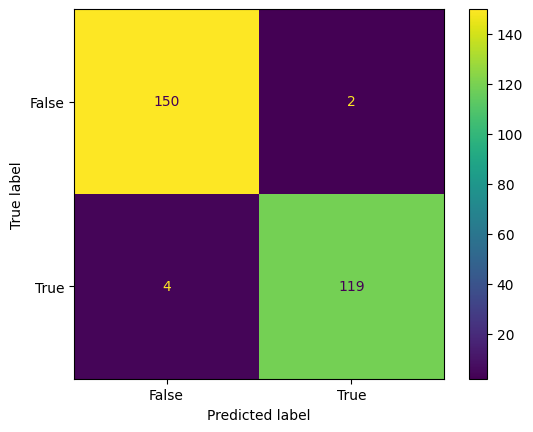

In [219]:
conf_mtx_bill_plot = ConfusionMatrixDisplay(
    confusion_matrix=conf_mtx_bill,
    display_labels=[False,True]
)

conf_mtx_bill_plot.plot()
plt.show()

![scikit-learn - Machine Learning in Python](assets/Scikit_Learn_05.webp)

In [220]:
report_bill = classification_report(
    y_test_bill, y_pred_bill
)
print(report_bill)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       152
           1       0.98      0.97      0.98       123

    accuracy                           0.98       275
   macro avg       0.98      0.98      0.98       275
weighted avg       0.98      0.98      0.98       275



|              | precision | recall | f1-score | support |
|    --        |  --  |  --  |  --  |  --  |
| 0            | 0.97 | 0.99 | 0.98 |   152  |
| 1            | 0.98 | 0.97 | 0.98 |   123  |
| accuracy     |      |      | 0.98 |  275  |
| macro avg    | 0.98 | 0.98 | 0.98 |  275  |
| weighted avg | 0.98 | 0.98 | 0.98 |  275  |

## Random Forest Classifier

* Does not require normalization
* Is not sensitive to missing values
* Low risk of overfitting
* Efficient with large datasets
* High accuracy

### Dataset

In [2]:
!wget https://raw.githubusercontent.com/xjcjiacheng/data-analysis/master/heart%20disease%20UCI/heart.csv -P datasets

--2023-05-20 21:14:20--  https://raw.githubusercontent.com/xjcjiacheng/data-analysis/master/heart%20disease%20UCI/heart.csv
Loaded CA certificate '/etc/ssl/certs/ca-certificates.crt'
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11328 (11K) [text/plain]
Saving to: ‘datasets/heart.csv’

heart.csv           100%[===================>]  11.06K  --.-KB/s    in 0.004s  

2023-05-20 21:14:21 (2.69 MB/s) - ‘datasets/heart.csv’ saved [11328/11328]



In [2]:
heart_df = pd.read_csv('datasets/heart.csv')
heart_df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


|   | age | sex | cp | trestbps | chol | fbs | restecg | thalach | exang | oldpeak | slope | ca | thal | target |
| -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- |
| 0 | 63 | 1 | 3 | 145 | 233 | 1 | 0 | 150 | 0 | 2.3 | 0 | 0 | 1 | 1 |
| 1 | 37 | 1 | 2 | 130 | 250 | 0 | 1 | 187 | 0 | 3.5 | 0 | 0 | 2 | 1 |
| 2 | 41 | 0 | 1 | 130 | 204 | 0 | 0 | 172 | 0 | 1.4 | 2 | 0 | 2 | 1 |
| 3 | 56 | 1 | 1 | 120 | 236 | 0 | 1 | 178 | 0 | 0.8 | 2 | 0 | 2 | 1 |
| 4 | 57 | 0 | 0 | 120 | 354 | 0 | 1 | 163 | 1 | 0.6 | 2 | 0 | 2 | 1 |

### Preprocessing

In [3]:
# remove target feature from training set
X_heart = heart_df.drop('target', axis=1)
y_heart = heart_df['target']

In [4]:
X_train_heart, X_test_heart, y_train_heart, y_test_heart = train_test_split(
    X_heart,
    y_heart,
    test_size=0.2,
    random_state=0
)

### Model Fitting

In [5]:
forest_classifier = RandomForestClassifier(n_estimators=10, criterion='entropy')

forest_classifier.fit(X_train_heart, y_train_heart)

RandomForestClassifier(criterion='entropy', n_estimators=10)

### Evaluation

In [6]:
y_pred_heart = forest_classifier.predict(X_test_heart)

In [7]:
conf_mtx_heart = confusion_matrix(y_test_heart, y_pred_heart)
conf_mtx_heart

# array([[24,  3],
#        [ 5, 29]])

array([[24,  3],
       [ 5, 29]])

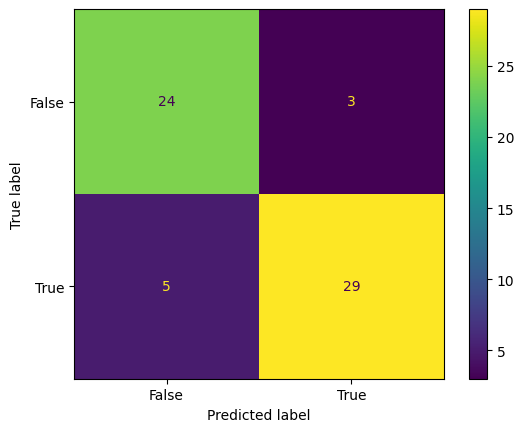

In [12]:
conf_mtx_heart_plot = ConfusionMatrixDisplay(
    confusion_matrix=conf_mtx_heart,
    display_labels=[False,True]
)

conf_mtx_heart_plot.plot()
plt.show()

![scikit-learn - Machine Learning in Python](assets/Scikit_Learn_06.webp)

In [13]:
report_heart = classification_report(
    y_test_heart, y_pred_heart
)
print(report_heart)

              precision    recall  f1-score   support

           0       0.83      0.89      0.86        27
           1       0.91      0.85      0.88        34

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



|              | precision | recall | f1-score | support |
|    --        |  --  |  --  |  --  |  --  |
| 0            | 0.83 | 0.89 | 0.86 |   27  |
| 1            | 0.91 | 0.85 | 0.88 |   34  |
| accuracy     |      |      | 0.87 |  61  |
| macro avg    | 0.87 | 0.87 | 0.87 |  61  |
| weighted avg | 0.87 | 0.87 | 0.87 |  61  |

## Random Forest Hyperparameter Tuning

### Testing Hyperparameters

In [8]:
rdnfor_classifier = RandomForestClassifier(
    n_estimators=2,
    min_samples_split=2,
    min_samples_leaf=1,
    criterion='entropy'
)
rdnfor_classifier.fit(X_train_heart, y_train_heart)

RandomForestClassifier(criterion='entropy', n_estimators=2)

In [9]:
rdnfor_pred = rdnfor_classifier.predict(X_test_heart)
print('Accuracy Score: ', accuracy_score(y_test_heart, rdnfor_pred).round(4)*100, '%')

# Accuracy Score:  73.77 %

Accuracy Score:  73.77 %


### Grid-Search Cross-Validation

Try a set of values for selected Hyperparameter to find the optimal configuration.

In [10]:
param_grid = {
    'n_estimators': [5, 25, 50, 75,100, 125],
    'min_samples_split': [1,2,3],
    'min_samples_leaf': [1,2,3],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_features' : ['sqrt', 'log2']
}

grid_search = GridSearchCV(
    estimator = rdnfor_classifier,
    param_grid = param_grid
)

grid_search.fit(X_train_heart, y_train_heart)

GridSearchCV(estimator=RandomForestClassifier(criterion='entropy',
                                              n_estimators=2),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [1, 2, 3],
                         'n_estimators': [5, 25, 50, 75, 100, 125]})

In [11]:
print('Best Parameter: ', grid_search.best_params_)
# Best Parameter:  {
# 'criterion': 'entropy',
# 'max_features': 'sqrt',
# 'min_samples_leaf': 2,
# 'min_samples_split': 1,
# 'n_estimators': 25
# }

Best Parameter:  {'criterion': 'entropy', 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 1, 'n_estimators': 25}


In [12]:
rdnfor_classifier_optimized = RandomForestClassifier(
    n_estimators=25,
    min_samples_split=1,
    min_samples_leaf=2,
    criterion='entropy',
    max_features='sqrt'
)

rdnfor_classifier_optimized.fit(X_train_heart, y_train_heart)

RandomForestClassifier(criterion='entropy', min_samples_leaf=2,
                       min_samples_split=1, n_estimators=25)

In [13]:
rdnfor_pred_optimized = rdnfor_classifier_optimized.predict(X_test_heart)
print('Accuracy Score: ', accuracy_score(y_test_heart, rdnfor_pred_optimized).round(4)*100, '%')

# Accuracy Score:  85.25 %

Accuracy Score:  85.25 %


## SVC Model

__Support Vector Machines__ (`SVM`s) are a set of supervised learning methods used for classification, regression and outliers detection.


* Effective in high dimensional spaces.
* Still effective in cases where number of dimensions is greater than the number of samples.

### Dataset

* [Three different varieties of the wheat - Kaggle.com](https://www.kaggle.com/datasets/dongeorge/seed-from-uci)

Measurements of geometrical properties of kernels belonging to three different varieties of wheat:

* __A__: Area,
* __P__: Perimeter,
* __C__ = 4piA/P^2: Compactness,
* __LK__: Length of kernel,
* __WK__: Width of kernel,
* __A\_Coef__: Asymmetry coefficient
* __LKG__: Length of kernel groove.

In [17]:
!wget https://raw.githubusercontent.com/prasertcbs/basic-dataset/master/Seed_Data.csv -P datasets

--2023-05-21 14:56:19--  https://raw.githubusercontent.com/prasertcbs/basic-dataset/master/Seed_Data.csv
Loaded CA certificate '/etc/ssl/certs/ca-certificates.crt'
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9527 (9.3K) [text/plain]
Saving to: ‘datasets/Seed_Data.csv’

Seed_Data.csv       100%[===================>]   9.30K  --.-KB/s    in 0.003s  

2023-05-21 14:56:20 (3.09 MB/s) - ‘datasets/Seed_Data.csv’ saved [9527/9527]



In [18]:
wheat_df = pd.read_csv('datasets/Seed_Data.csv')
wheat_df.head(5)

,A,P,C,LK,WK,A_Coef,LKG,target
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0


|   | A | P | C | LK | WK | A_Coef | LKG | target |
| -- | -- | -- | -- | -- | -- | -- | -- | -- |
| 0 | 15.26 | 14.84 | 0.8710 | 5.763 | 3.312 | 2.221 | 5.220 | 0 |
| 1 | 14.88 | 14.57 | 0.8811 | 5.554 | 3.333 | 1.018 | 4.956 | 0 |
| 2 | 14.29 | 14.09 | 0.9050 | 5.291 | 3.337 | 2.699 | 4.825 | 0 |
| 3 | 13.84 | 13.94 | 0.8955 | 5.324 | 3.379 | 2.259 | 4.805 | 0 |
| 4 | 16.14 | 14.99 | 0.9034 | 5.658 | 3.562 | 1.355 | 5.175 | 0 |

In [20]:
wheat_df.info()

# <class 'pandas.core.frame.DataFrame'>
# RangeIndex: 210 entries, 0 to 209
# Data columns (total 8 columns):
#  #   Column  Non-Null Count  Dtype  
# ---  ------  --------------  -----  
#  0   A       210 non-null    float64
#  1   P       210 non-null    float64
#  2   C       210 non-null    float64
#  3   LK      210 non-null    float64
#  4   WK      210 non-null    float64
#  5   A_Coef  210 non-null    float64
#  6   LKG     210 non-null    float64
#  7   target  210 non-null    int64  
# dtypes: float64(7), int64(1)
# memory usage: 13.2 KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       210 non-null    float64
 1   P       210 non-null    float64
 2   C       210 non-null    float64
 3   LK      210 non-null    float64
 4   WK      210 non-null    float64
 5   A_Coef  210 non-null    float64
 6   LKG     210 non-null    float64
 7   target  210 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 13.2 KB


#### Preprocessing

In [22]:
# remove target feature from training set
X_wheat = wheat_df.drop('target', axis=1)
y_wheat = wheat_df['target']

print(X_wheat.shape, y_wheat.shape)
# (210, 7) (210,)

(210, 7) (210,)


In [28]:
# train/test split
X_train_wheat, X_test_wheat, y_train_wheat, y_test_wheat = train_test_split(
    X_wheat,
    y_wheat,
    test_size=0.2,
    random_state=42
)

In [ ]:
# normalization
sc_wheat = StandardScaler()
X_train_wheat=sc_wheat.fit_transform(X_train_wheat)
X_test_wheat=sc_wheat.fit_transform(X_test_wheat)

#### Model Training

In [32]:
# SVM classifier fitting
clf_wheat = svm.SVC()
clf_wheat.fit(X_train_wheat, y_train_wheat)

SVC()

#### Model Evaluation

In [34]:
# Predictions
y_wheat_pred = clf_wheat.predict(X_test_wheat)

In [36]:
print(
    'Accuracy Score: ',
    accuracy_score(y_test_wheat, y_wheat_pred, normalize=True).round(4)*100, '%'
)
# Accuracy Score:  90.48 %

Accuracy Score:  90.48 %


In [38]:
report_wheat = classification_report(
    y_test_wheat, y_wheat_pred
)
print(report_wheat)

              precision    recall  f1-score   support

           0       0.82      0.82      0.82        11
           1       1.00      0.93      0.96        14
           2       0.89      0.94      0.91        17

    accuracy                           0.90        42
   macro avg       0.90      0.90      0.90        42
weighted avg       0.91      0.90      0.91        42



|               | precision | recall | f1-score | support | 
| -- | -- | -- | -- | -- |
|           0  | 0.82 | 0.82 | 0.82 | 11 |
|           1  | 1.00 | 0.93 | 0.96 | 14 |
|            2 | 0.89 | 0.94 | 0.91 | 17 |
|   accuracy   |      |      | 0.90 | 42 |
|    macro avg | 0.90 | 0.90 | 0.90 | 42 |
| weighted avg | 0.91 | 0.90 | 0.91 | 42 |

In [40]:
conf_mtx_wheat = confusion_matrix(y_test_wheat, y_wheat_pred)
conf_mtx_wheat

# array([[ 9,  0,  2],
#        [ 1, 13,  0],
#        [ 1,  0, 16]])

array([[ 9,  0,  2],
       [ 1, 13,  0],
       [ 1,  0, 16]])

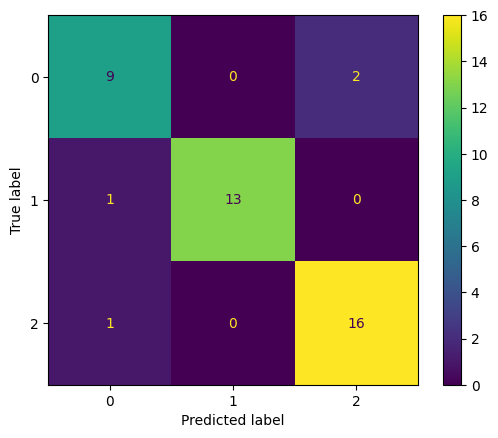

In [44]:
conf_mtx_wheat_plot = ConfusionMatrixDisplay(
    confusion_matrix=conf_mtx_wheat
)

conf_mtx_wheat_plot.plot()
plt.show()

![scikit-learn - Machine Learning in Python](assets/Scikit_Learn_07.webp)

### Margin Plots for Support Vector Classifier

In [3]:
# get dataset
!wget https://github.com/alpeshraj/mouse_viral_study/raw/main/mouse_viral_study.csv -P datasets

--2023-05-24 13:10:04--  https://github.com/alpeshraj/mouse_viral_study/raw/main/mouse_viral_study.csv
Loaded CA certificate '/etc/ssl/certs/ca-certificates.crt'
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/alpeshraj/mouse_viral_study/main/mouse_viral_study.csv [following]
--2023-05-24 13:10:05--  https://raw.githubusercontent.com/alpeshraj/mouse_viral_study/main/mouse_viral_study.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15698 (15K) [text/plain]
Saving to: ‘datasets/mouse_viral_study.csv.1’

mouse_viral_study.c 100%[===================>]  15.33K  --.-KB/s    in 0.007s  

2023-05-

,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1


In [2]:
mice_df = pd.read_csv('datasets/mouse_viral_study.csv')
mice_df.head(5)

,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1


|   | Med_1_mL | Med_2_mL | Virus Present |
| -- | -- | -- | -- |
| 0 | 6.508231 | 8.582531 | 0 |
| 1 | 4.126116 | 3.073459 | 1 |
| 2 | 6.427870 | 6.369758 | 0 |
| 3 | 3.672953 | 4.905215 | 1 |
| 4 | 1.580321 | 2.440562 | 1 |

<AxesSubplot: xlabel='Med_1_mL', ylabel='Med_2_mL'>

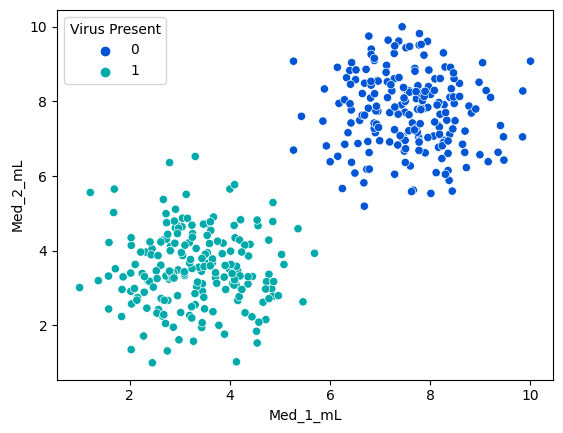

In [4]:
sns.scatterplot(data=mice_df, x='Med_1_mL',y='Med_2_mL',hue='Virus Present', palette='winter')

![scikit-learn - Machine Learning in Python](assets/Scikit_Learn_12.webp)

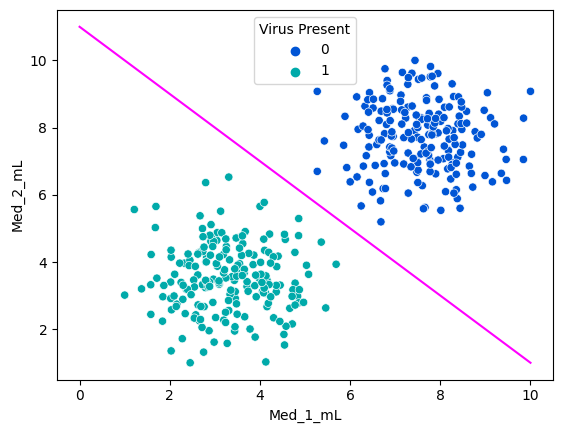

In [5]:
# visualizing a hyperplane to separate the two features
sns.scatterplot(data=mice_df, x='Med_1_mL',y='Med_2_mL',hue='Virus Present', palette='winter')

x = np.linspace(0,10,100)
m = -1
b = 11
y = m*x + b

plt.plot(x,y,c='fuchsia')

![scikit-learn - Machine Learning in Python](assets/Scikit_Learn_13.webp)

#### SVC with a Linear Kernel

In [4]:
# using a support vector classifier to calculate maximize the margin between both classes

y_vir = mice_df['Virus Present']
X_vir = mice_df.drop('Virus Present',axis=1)

# kernel : {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'}
# the smaller the C value the more feature vectors will be inside the margin
model_vir = svm.SVC(kernel='linear', C=1000)

model_vir.fit(X_vir, y_vir)

SVC(C=1000, kernel='linear')

In [38]:
# import helper function
from helper.svm_margin_plot import plot_svm_boundary

/home/xiaodie/.local/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


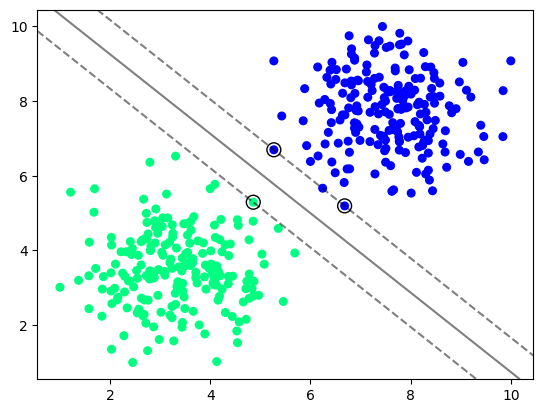

In [8]:
plot_svm_boundary(model_vir, X_vir, y_vir)

![scikit-learn - Machine Learning in Python](assets/Scikit_Learn_14.webp)

/home/xiaodie/.local/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


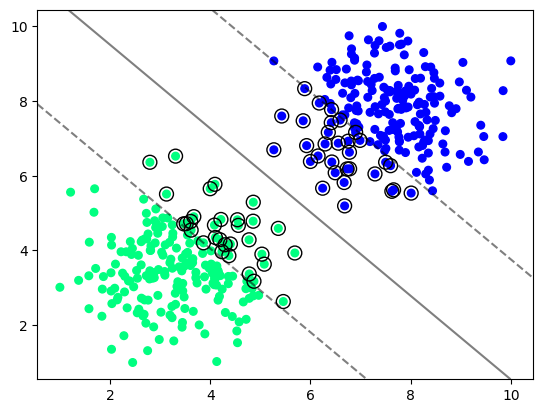

In [10]:
# the smaller the C value the more feature vectors will be inside the margin
model_vir_low_reg = svm.SVC(kernel='linear', C=0.005)
model_vir_low_reg.fit(X_vir, y_vir)
plot_svm_boundary(model_vir_low_reg, X_vir, y_vir)

![scikit-learn - Machine Learning in Python](assets/Scikit_Learn_15.webp)

#### SVC with a Radial Basis Function Kernel

/home/xiaodie/.local/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


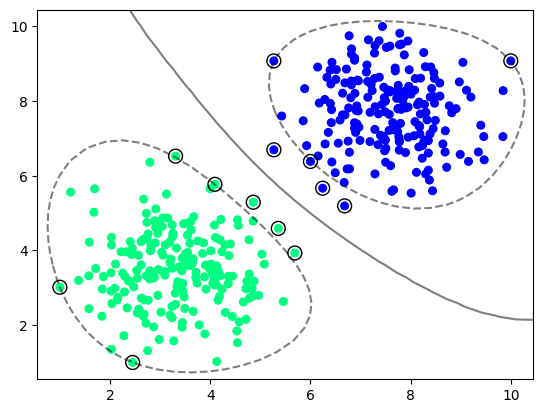

In [11]:
model_vir_rbf = svm.SVC(kernel='rbf', C=1)
model_vir_rbf.fit(X_vir, y_vir)
plot_svm_boundary(model_vir_rbf, X_vir, y_vir)

![scikit-learn - Machine Learning in Python](assets/Scikit_Learn_16.webp)

/home/xiaodie/.local/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


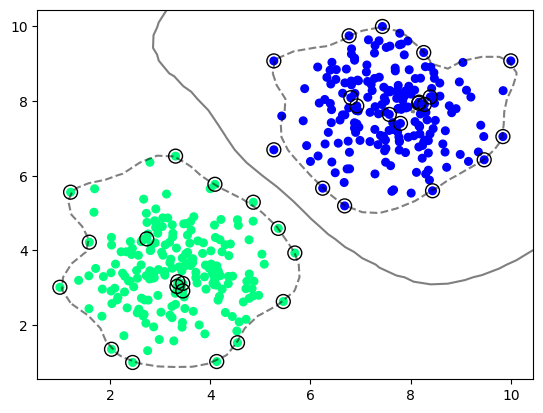

In [12]:
# # gamma : {'scale', 'auto'} or float, default='scale'
# - if ``gamma='scale'`` (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,
# - if 'auto', uses 1 / n_features
# - if float, must be non-negative.
model_vir_rbf_auto_gamma = svm.SVC(kernel='rbf', C=1, gamma='auto')
model_vir_rbf_auto_gamma.fit(X_vir, y_vir)
plot_svm_boundary(model_vir_rbf_auto_gamma, X_vir, y_vir)

![scikit-learn - Machine Learning in Python](assets/Scikit_Learn_17.webp)

#### SVC with a Sigmoid Kernel

/home/xiaodie/.local/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


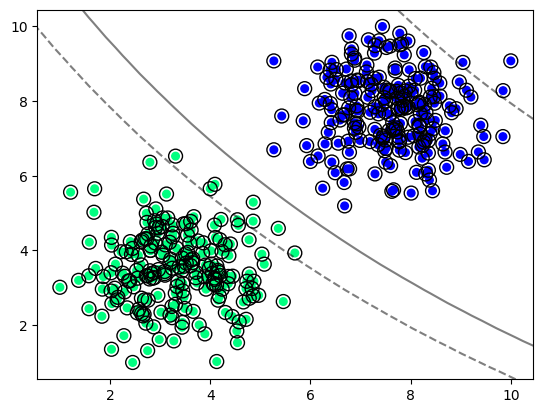

In [15]:
model_vir_sigmoid = svm.SVC(kernel='sigmoid', gamma='scale')
model_vir_sigmoid.fit(X_vir, y_vir)
plot_svm_boundary(model_vir_sigmoid, X_vir, y_vir)

![scikit-learn - Machine Learning in Python](assets/Scikit_Learn_18.webp)

#### SVC with a Polynomial Kernel

/home/xiaodie/.local/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


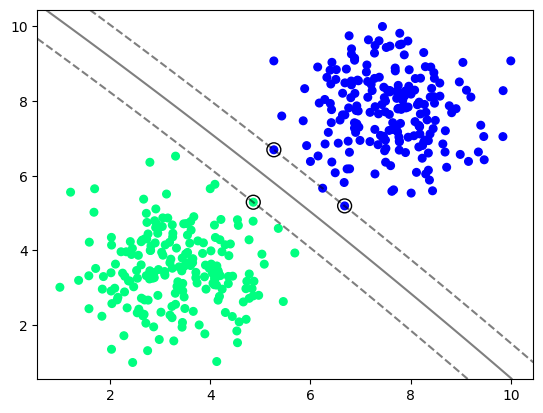

In [21]:
model_vir_poly = svm.SVC(kernel='poly', C=1, degree=2)
model_vir_poly.fit(X_vir, y_vir)
plot_svm_boundary(model_vir_poly, X_vir, y_vir)

![scikit-learn - Machine Learning in Python](assets/Scikit_Learn_19.webp)

### Grid Search for Support Vector Classifier

In [24]:
svm_base_model = svm.SVC()

param_grid = {
    'C':[0.01, 0.1, 1],
    'kernel': ['linear', 'rbf']
}

In [25]:
grid = GridSearchCV(svm_base_model, param_grid) 
grid.fit(X_vir, y_vir)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1], 'kernel': ['linear', 'rbf']})

In [26]:
grid.best_params_
# {'C': 0.01, 'kernel': 'linear'}

{'C': 0.01, 'kernel': 'linear'}

### Support Vector Regression

In [5]:
# dataset
!wget https://github.com/fsdhakan/ML/raw/main/cement_slump.csv -P datasets

--2023-05-24 20:19:11--  https://github.com/fsdhakan/ML/raw/main/cement_slump.csv
Loaded CA certificate '/etc/ssl/certs/ca-certificates.crt'
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/fsdhakan/ML/main/cement_slump.csv [following]
--2023-05-24 20:19:13--  https://raw.githubusercontent.com/fsdhakan/ML/main/cement_slump.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4450 (4.3K) [text/plain]
Saving to: ‘datasets/cement_slump.csv’

cement_slump.csv    100%[===================>]   4.35K  --.-KB/s    in 0.001s  

2023-05-24 20:19:13 (4.59 MB/s) - ‘datasets/cement_slump.csv’ saved [4450/4450

In [6]:
cement_df = pd.read_csv('datasets/cement_slump.csv')
cement_df.head(5)

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.0,62.0,34.99
1,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0,41.14
2,162.0,148.0,191.0,179.0,16.0,840.0,743.0,1.0,20.0,41.81
3,162.0,148.0,190.0,179.0,19.0,838.0,741.0,3.0,21.5,42.08
4,154.0,112.0,144.0,220.0,10.0,923.0,658.0,20.0,64.0,26.82


|    | Cement | Slag | Fly ash | Water | SP | Coarse Aggr. | Fine Aggr. | SLUMP(cm) | FLOW(cm) | Compressive Strength (28-day)(Mpa) |
| -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- |
| 0 | 273.0 | 82.0 | 105.0 | 210.0 | 9.0 | 904.0 | 680.0 | 23.0 | 62.0 | 34.99 |
| 1 | 163.0 | 149.0 | 191.0 | 180.0 | 12.0 | 843.0 | 746.0 | 0.0 | 20.0 | 41.14 |
| 2 | 162.0 | 148.0 | 191.0 | 179.0 | 16.0 | 840.0 | 743.0 | 1.0 | 20.0 | 41.81 |
| 3 | 162.0 | 148.0 | 190.0 | 179.0 | 19.0 | 838.0 | 741.0 | 3.0 | 21.5 | 42.08 |
| 4 | 154.0 | 112.0 | 144.0 | 220.0 | 10.0 | 923.0 | 658.0 | 20.0 | 64.0 | 26.82 |

<AxesSubplot: >

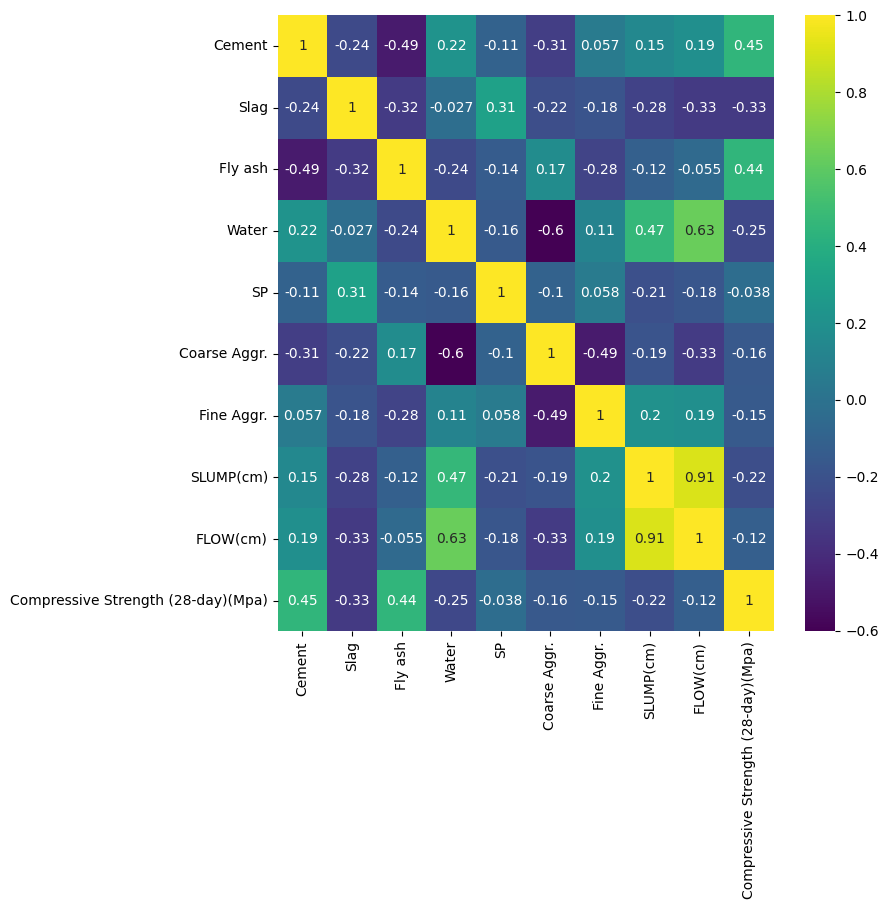

In [18]:
plt.figure(figsize=(8,8))
sns.heatmap(cement_df.corr(), annot=True, cmap='viridis')

![scikit-learn - Machine Learning in Python](assets/Scikit_Learn_20.webp)

In [21]:
# drop labels
X_cement = cement_df.drop('Compressive Strength (28-day)(Mpa)', axis=1)
y_cement = cement_df['Compressive Strength (28-day)(Mpa)']

In [22]:
 # train/test split
    X_train_cement, X_test_cement, y_train_cement, y_test_cement = train_test_split(
     X_cement,
     y_cement,
     test_size=0.3,
     random_state=42
 )

In [23]:
# normalize
scaler = StandardScaler()
X_train_cement_scaled = scaler.fit_transform(X_train_cement)
X_test_cement_scaled = scaler.transform(X_test_cement)

#### Base Model Run

In [33]:
base_model_cement = svm.SVR()

In [34]:
base_model_cement.fit(X_train_cement_scaled, y_train_cement)

base_model_predictions = base_model_cement.predict(X_test_cement_scaled)

In [35]:
mae = mean_absolute_error(y_test_cement, base_model_predictions)
rmse = mean_squared_error(y_test_cement, base_model_predictions)
mean_abs = y_test_cement.mean()
avg_error = mae * 100 / mean_abs

print('MAE: ', mae.round(2), 'RMSE: ', rmse.round(2), 'Relative Avg. Error: ', avg_error.round(2), '%')

MAE:  4.68 RMSE:  36.95 Relative Avg. Error:  12.75 %


| MAE | RMSE |  Relative Avg. Error |
| -- | -- | -- |
| 4.68 | 36.95 | 12.75 % |

#### Grid Search for better Hyperparameter

In [36]:
param_grid = {
    'C': [0.001,0.01,0.1,0.5,1],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'],
    'degree': [2,3,4],
    'epsilon': [0,0.01,0.1,0.5,1,2]
}

In [39]:
cement_grid = GridSearchCV(base_model_cement, param_grid)
cement_grid.fit(X_train_cement_scaled, y_train_cement)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1], 'degree': [2, 3, 4],
                         'epsilon': [0, 0.01, 0.1, 0.5, 1, 2],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']})

In [41]:
cement_grid.best_params_
# {'C': 1, 'degree': 2, 'epsilon': 2, 'gamma': 'scale', 'kernel': 'linear'}

{'C': 1, 'degree': 2, 'epsilon': 2, 'gamma': 'scale', 'kernel': 'linear'}

In [42]:
cement_grid_predictions = cement_grid.predict(X_test_cement_scaled)

In [43]:
mae_grid = mean_absolute_error(y_test_cement, cement_grid_predictions)
rmse_grid = mean_squared_error(y_test_cement, cement_grid_predictions)
mean_abs = y_test_cement.mean()
avg_error_grid = mae_grid * 100 / mean_abs

print('MAE: ', mae_grid.round(2), 'RMSE: ', rmse_grid.round(2), 'Relative Avg. Error: ', avg_error_grid.round(2), '%')

MAE:  1.85 RMSE:  5.2 Relative Avg. Error:  5.05 %


| MAE | RMSE |  Relative Avg. Error |
| -- | -- | -- |
| 1.85 | 5.2 | 5.05 % |

### Example Task - Wine Fraud

#### Data Exploration

In [3]:
# dataset
!wget https://github.com/CAPGAGA/Fraud-in-Wine/raw/main/wine_fraud.csv -P datasets

--2023-05-25 12:50:42--  https://github.com/CAPGAGA/Fraud-in-Wine/raw/main/wine_fraud.csv
Loaded CA certificate '/etc/ssl/certs/ca-certificates.crt'
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/CAPGAGA/Fraud-in-Wine/main/wine_fraud.csv [following]
--2023-05-25 12:50:43--  https://raw.githubusercontent.com/CAPGAGA/Fraud-in-Wine/main/wine_fraud.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 490184 (479K) [text/plain]
Saving to: ‘datasets/wine_fraud.csv’

wine_fraud.csv      100%[===================>] 478.70K   935KB/s    in 0.5s    

2023-05-25 12:50:45 (935 KB/s) - ‘datasets/wine_fraud.

In [2]:
wine_df = pd.read_csv('datasets/wine_fraud.csv')
wine_df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Legit,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Legit,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red


|  | fixed acidity | volatile acidity | citric acid | residual sugar | chlorides | free sulfur dioxide | total sulfur dioxide | density | pH | sulphates | alcohol | quality | type |
| -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- |
| 0 | 7.4 | 0.70 | 0.00 | 1.9 | 0.076 | 11.0 | 34.0 | 0.9978 | 3.51 | 0.56 | 9.4 | Legit | red |
| 1 | 7.8 | 0.88 | 0.00 | 2.6 | 0.098 | 25.0 | 67.0 | 0.9968 | 3.20 | 0.68 | 9.8 | Legit | red |
| 2 | 7.8 | 0.76 | 0.04 | 2.3 | 0.092 | 15.0 | 54.0 | 0.9970 | 3.26 | 0.65 | 9.8 | Legit | red |
| 3 | 11.2 | 0.28 | 0.56 | 1.9 | 0.075 | 17.0 | 60.0 | 0.9980 | 3.16 | 0.58 | 9.8 | Legit | red |
| 4 | 7.4 | 0.70 | 0.00 | 1.9 | 0.076 | 11.0 | 34.0 | 0.9978 | 3.51 | 0.56 | 9.4 | Legit | red |

In [6]:
wine_df.value_counts('quality')

quality
Legit    6251
Fraud     246
dtype: int64

| quality | |
| -- | -- |
| Legit | 6251 |
| Fraud  | 246 |
_dtype: int64_

<AxesSubplot: title={'center': 'Wine - Quality distribution'}>

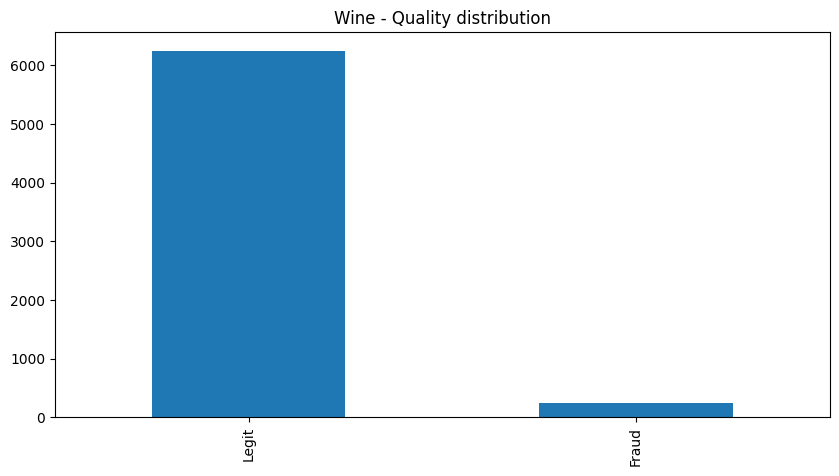

In [17]:
wine_df['quality'].value_counts().plot(
    kind='bar',
    figsize=(10,5), 
    title='Wine - Quality distribution')


![scikit-learn - Machine Learning in Python](assets/Scikit_Learn_21.webp)

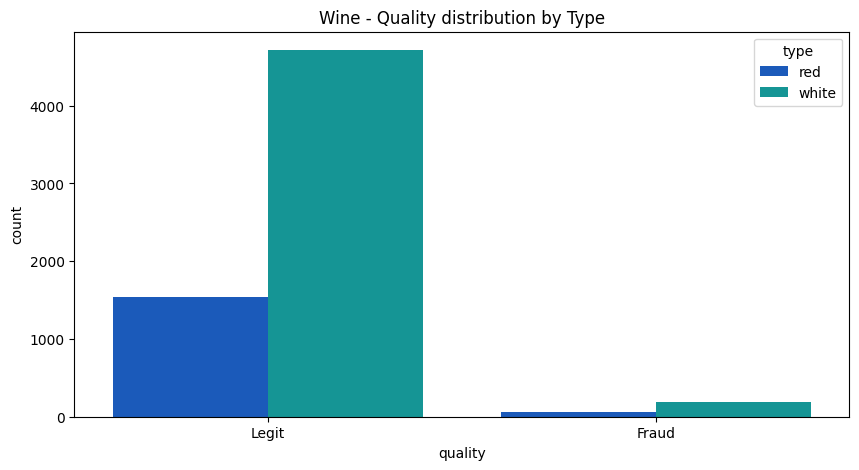

In [18]:
plt.figure(figsize=(10, 5))
plt.title('Wine - Quality distribution by Type')

sns.countplot(
    data=wine_df,
    x='quality',
    hue='type',
    palette='winter'
)

plt.savefig('assets/Scikit_Learn_22.webp', bbox_inches='tight')

![scikit-learn - Machine Learning in Python](assets/Scikit_Learn_22.webp)

In [3]:
wine_df_white = wine_df[wine_df['type'] == 'white']
wine_df_red = wine_df[wine_df['type'] == 'red']

In [4]:
# fraud percentage by wine type
legit_white_wines = wine_df_white.value_counts('quality')[0]
fraud_white_wines = wine_df_white.value_counts('quality')[1]
white_fraud_percentage = fraud_white_wines * 100 / (legit_white_wines + fraud_white_wines)

legit_red_wines = wine_df_red.value_counts('quality')[0]
fraud_red_wines = wine_df_red.value_counts('quality')[1]
red_fraud_percentage = fraud_red_wines * 100 / (legit_red_wines + fraud_red_wines)

print(
    'Fraud Percentage: \nWhite Wines: ',
    white_fraud_percentage.round(2),
    '% \nRed Wines: ',
    red_fraud_percentage.round(2),
    '%'
)

Fraud Percentage: 
White Wines:  3.74 % 
Red Wines:  3.94 %


| Fraud Percentage: | |
| -- | -- |
| White Wines: | 3.74 % |
| Red Wines: | 3.94 % |

In [5]:
# make features numeric
feature_map = {
    'Legit': 0,
    'Fraud': 1,
    'red': 0,
    'white': 1
}

wine_df['quality_enc'] = wine_df['quality'].map(feature_map)
wine_df['type_enc'] = wine_df['type'].map(feature_map)
wine_df[['quality', 'quality_enc', 'type', 'type_enc']]

,quality,quality_enc,type,type_enc
0,Legit,0,red,0
1,Legit,0,red,0
2,Legit,0,red,0
3,Legit,0,red,0
4,Legit,0,red,0
...,...,...,...,...
6492,Legit,0,white,1
6493,Legit,0,white,1
6494,Legit,0,white,1
6495,Legit,0,white,1


|  | quality | quality_enc | type | type_enc |
| -- | -- | -- | -- | -- |
| 0 | Legit | 0 | red | 0 |
| 1 | Legit | 0 | red | 0 |
| 2 | Legit | 0 | red | 0 |
| 3 | Legit | 0 | red | 0 |
| 4 | Legit | 0 | red | 0 |
| ... |
| 6492 | Legit | 0 | white | 1 |
| 6493 | Legit | 0 | white | 1 |
| 6494 | Legit | 0 | white | 1 |
| 6495 | Legit | 0 | white | 1 |
| 6496 | Legit | 0 | white | 1 |
_6497 rows × 4 columns_

In [6]:
# find correlations
wine_df.corr(numeric_only=True)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_enc,type_enc
fixed acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,0.021794,-0.486740
volatile acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,0.151228,-0.653036
citric acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,-0.061789,0.187397
residual sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.048756,0.348821
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,0.034499,-0.512678
free sulfur dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,-0.085204,0.471644
total sulfur dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.035252,0.700357
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,0.016351,-0.390645
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.020107,-0.329129
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,-0.034046,-0.487218


|  | fixed acidity | volatile acidity | citric acid | residual sugar | chlorides | free sulfur dioxide | total sulfur dioxide | density | pH | sulphates | alcohol | quality_enc | type_enc |
| -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- | -- |
| fixed acidity | 1.000000 | 0.219008 | 0.324436 | -0.111981 | 0.298195 | -0.282735 | -0.329054 | 0.458910 | -0.252700 | 0.299568 | -0.095452 | 0.021794 | -0.486740 |
| volatile acidity | 0.219008 | 1.000000 | -0.377981 | -0.196011 | 0.377124 | -0.352557 | -0.414476 | 0.271296 | 0.261454 | 0.225984 | -0.037640 | 0.151228 | -0.653036 |
| citric acid | 0.324436 | -0.377981 | 1.000000 | 0.142451 | 0.038998 | 0.133126 | 0.195242 | 0.096154 | -0.329808 | 0.056197 | -0.010493 | -0.061789 | 0.187397 |
| residual sugar | -0.111981 | -0.196011 | 0.142451 | 1.000000 | -0.128940 | 0.402871 | 0.495482 | 0.552517 | -0.267320 | -0.185927 | -0.359415 | -0.048756 | 0.348821 |
| chlorides | 0.298195 | 0.377124 | 0.038998 | -0.128940 | 1.000000 | -0.195045 | -0.279630 | 0.362615 | 0.044708 | 0.395593 | -0.256916 | 0.034499 | -0.512678 |
| free sulfur dioxide | -0.282735 | -0.352557 | 0.133126 | 0.402871 | -0.195045 | 1.000000 | 0.720934 | 0.025717 | -0.145854 | -0.188457 | -0.179838 | -0.085204 | 0.471644 |
| total sulfur dioxide | -0.329054 | -0.414476 | 0.195242 | 0.495482 | -0.279630 | 0.720934 | 1.000000 | 0.032395 | -0.238413 | -0.275727 | -0.265740 | -0.035252 | 0.700357 |
| density | 0.458910 | 0.271296 | 0.096154 | 0.552517 | 0.362615 | 0.025717 | 0.032395 | 1.000000 | 0.011686 | 0.259478 | -0.686745 | 0.016351 | -0.390645 |
| pH | -0.252700 | 0.261454 | -0.329808 | -0.267320 | 0.044708 | -0.145854 | -0.238413 | 0.011686 | 1.000000 | 0.192123 | 0.121248 | 0.020107 | -0.329129 |
| sulphates | 0.299568 | 0.225984 | 0.056197 | -0.185927 | 0.395593 | -0.188457 | -0.275727 | 0.259478 | 0.192123 | 1.000000 | -0.003029 | -0.034046 | -0.487218 |
| alcohol | -0.095452 | -0.037640 | -0.010493 | -0.359415 | -0.256916 | -0.179838 | -0.265740 | -0.686745 | 0.121248 | -0.003029 | 1.000000 | -0.051141 | 0.032970 |
| quality_enc | 0.021794 | 0.151228 | -0.061789 | -0.048756 | 0.034499 | -0.085204 | -0.035252 | 0.016351 | 0.020107 | -0.034046 | -0.051141 | 1.000000 | -0.004598 |
| type_enc | -0.486740 | -0.653036 | 0.187397 | 0.348821 | -0.512678 | 0.471644 | 0.700357 | -0.390645 | -0.329129 | -0.487218 | 0.032970 | -0.004598 | 1.000000 |

<AxesSubplot: >

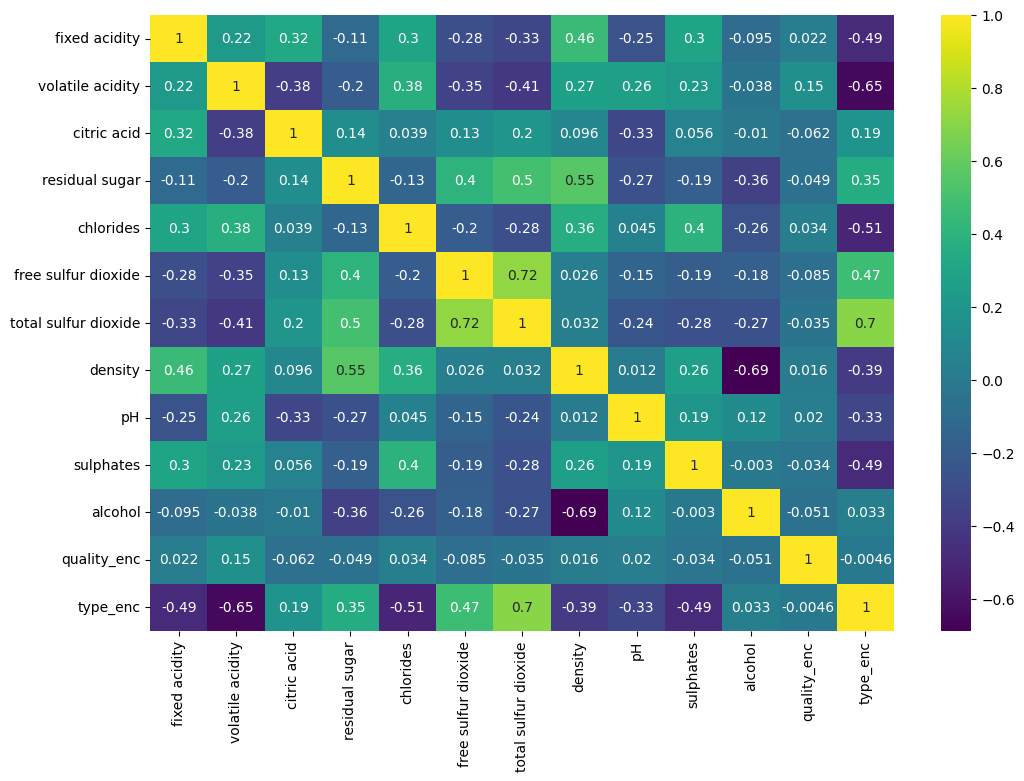

In [39]:
plt.figure(figsize=(12,8))
sns.heatmap(wine_df.corr(numeric_only=True), annot=True, cmap='viridis')

![scikit-learn - Machine Learning in Python](assets/Scikit_Learn_23.webp)

In [45]:
# how does the quality correlate to measurements
wine_df.corr(numeric_only=True)['quality_enc']

fixed acidity           0.021794
volatile acidity        0.151228
citric acid            -0.061789
residual sugar         -0.048756
chlorides               0.034499
free sulfur dioxide    -0.085204
total sulfur dioxide   -0.035252
density                 0.016351
pH                      0.020107
sulphates              -0.034046
alcohol                -0.051141
quality_enc             1.000000
type_enc               -0.004598
Name: quality_enc, dtype: float64

| Quality Correlstion | |
| -- | -- |
| fixed acidity        |  0.021794 |
| volatile acidity     |  0.151228 |
| citric acid          | -0.061789 |
| residual sugar       | -0.048756 |
| chlorides            |  0.034499 |
| free sulfur dioxide  | -0.085204 |
| total sulfur dioxide | -0.035252 |
| density              |  0.016351 |
| pH                   |  0.020107 |
| sulphates            | -0.034046 |
| alcohol              | -0.051141 |
| quality_enc          |  1.000000 |
| type_enc             | -0.004598 |
_Name: quality_enc, dtype: float64_

<AxesSubplot: title={'center': 'Correlation of Measurements to Quality'}>

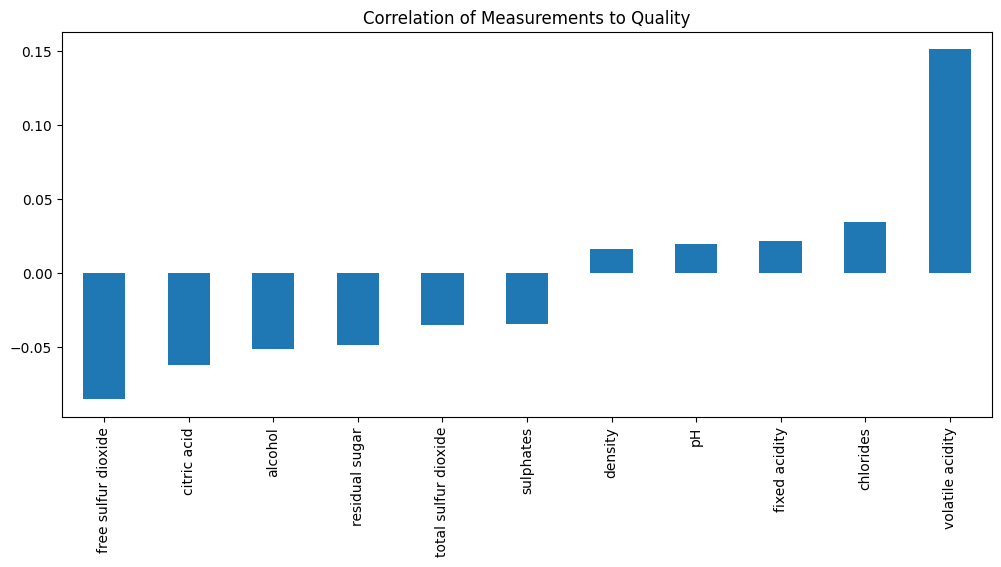

In [51]:
wine_df.corr(numeric_only=True)['quality_enc'][:-2].sort_values().plot(
    figsize=(12,5),
    kind='bar',
    title='Correlation of Measurements to Quality'
)

![scikit-learn - Machine Learning in Python](assets/Scikit_Learn_24.webp)

#### Regression Model

In [19]:
# separate target + remove string values
X_wine = wine_df.drop(['quality_enc', 'quality', 'type'], axis=1)
y_wine = wine_df['quality']

print(X_wine.shape, y_wine.shape)

(6497, 12) (6497,)


In [20]:
# train-test split
X_wine_train, X_wine_test, y_wine_train, y_wine_test = train_test_split(
    X_wine,
    y_wine,
    test_size=0.1,
    random_state=42
)

In [21]:
# normalization
scaler = StandardScaler()
X_wine_train_scaled = scaler.fit_transform(X_wine_train)
X_wine_test_scaled = scaler.transform(X_wine_test)

In [25]:
# create the SVC model using class_weight to balance out the
# dataset that heavily leaning towards non-frauds
svc_wine_base = svm.SVC(
    kernel='rbf',
    class_weight='balanced'
)

In [37]:
# grid search
param_grid = {
    'C': [0.5, 1, 1.5, 2, 2.5],
    'gamma' : ['scale', 'auto']
}

wine_grid = GridSearchCV(svc_wine_base, param_grid)
wine_grid.fit(X_wine_train_scaled, y_wine_train)
print('Best Params: ', wine_grid.best_params_)
# Best Params:  {'C': 2.5, 'gamma': 'auto'}

Best Params:  {'C': 2.5, 'gamma': 'auto'}


In [43]:
y_wine_pred = wine_grid.predict(X_wine_test_scaled)

In [44]:
print(
    'Accuracy Score: ',
    accuracy_score(y_wine_test, y_wine_pred, normalize=True).round(4)*100, '%'
)
# Accuracy Score:  84.77 %

Accuracy Score:  84.77 %


In [46]:
report_wine = classification_report(
    y_wine_test, y_wine_pred
)
print(report_wine)

              precision    recall  f1-score   support

       Fraud       0.16      0.68      0.26        25
       Legit       0.99      0.85      0.92       625

    accuracy                           0.85       650
   macro avg       0.57      0.77      0.59       650
weighted avg       0.95      0.85      0.89       650



|         | precision | recall | f1-score | support |
| --      | -- | -- | -- | -- |
| Fraud   | 0.16 | 0.68 | 0.26 |  25 |
| Legit   | 0.99 | 0.85 | 0.92 | 625 |
|     accuracy |      |      | 0.85 | 650 |
|    macro avg | 0.57 | 0.77 | 0.59 | 650 |
| weighted avg | 0.95 | 0.85 | 0.89 | 650 |

In [47]:
conf_mtx_wine = confusion_matrix(y_wine_test, y_wine_pred)
conf_mtx_wine

# array([[ 17,   8],
#        [ 91, 534]])

array([[ 17,   8],
       [ 91, 534]])

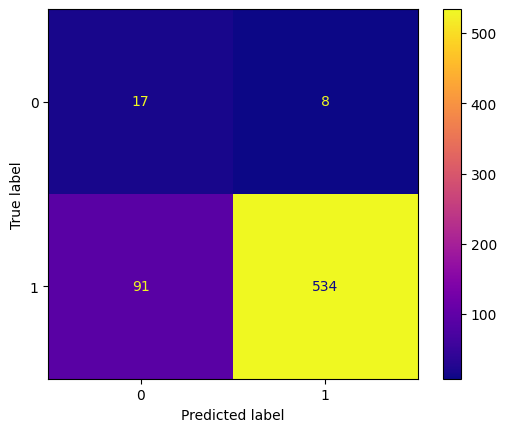

In [55]:
conf_mtx_wine_plot = ConfusionMatrixDisplay(
    confusion_matrix=conf_mtx_wine
)

conf_mtx_wine_plot.plot(cmap='plasma')

![scikit-learn - Machine Learning in Python](assets/Scikit_Learn_25.webp)

In [63]:
# expand grid search
param_grid = {
    'C': [1000, 1050, 1100, 1050, 1200],
    'gamma' : ['scale', 'auto']
}

wine_grid = GridSearchCV(svc_wine_base, param_grid)
wine_grid.fit(X_wine_train_scaled, y_wine_train)
print('Best Params: ', wine_grid.best_params_)
# Best Params:  {'C': 1100, 'gamma': 'scale'}

Best Params:  {'C': 1100, 'gamma': 'scale'}


Accuracy Score:  94.31 %
              precision    recall  f1-score   support

       Fraud       0.29      0.32      0.30        25
       Legit       0.97      0.97      0.97       625

    accuracy                           0.94       650
   macro avg       0.63      0.64      0.64       650
weighted avg       0.95      0.94      0.94       650



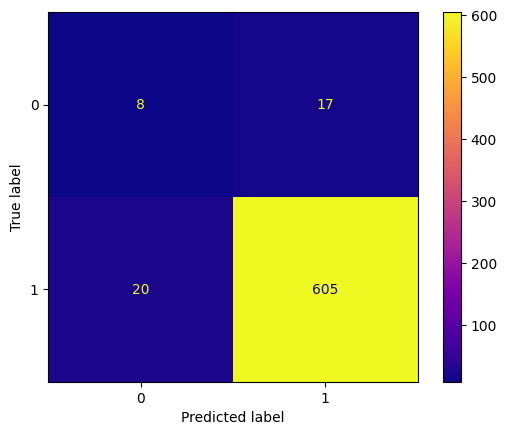

In [65]:
y_wine_pred = wine_grid.predict(X_wine_test_scaled)
print('Accuracy Score: ',accuracy_score(y_wine_test, y_wine_pred, normalize=True).round(4)*100, '%')
# Accuracy Score:  94.31 %
report_wine = classification_report(y_wine_test, y_wine_pred)
print(report_wine)
conf_mtx_wine = confusion_matrix(y_wine_test, y_wine_pred)

conf_mtx_wine_plot = ConfusionMatrixDisplay(
    confusion_matrix=conf_mtx_wine
)

conf_mtx_wine_plot.plot(cmap='plasma')

|         | precision | recall | f1-score | support |
| --      | -- | -- | -- | -- |
| Fraud   | 0.29 | 0.32 | 0.30 |  25 |
| Legit   | 0.97 | 0.97 | 0.97 | 625 |
|     accuracy |      |      | 0.85 | 650 |
|    macro avg | 0.63 | 0.64 | 0.64 | 650 |
| weighted avg | 0.95 | 0.94 | 0.94 | 650 |


![scikit-learn - Machine Learning in Python](assets/Scikit_Learn_26.webp)